<a href="https://colab.research.google.com/github/jblstorm/Beom/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%84%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EC%8A%A4%ED%8F%AC%EC%B8%A0%EA%B4%80%EC%A4%91%EC%98%88%EC%B8%A1%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pytimekr
from pytimekr import pytimekr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
KBL=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/프로농구_2018~2022_전체관중현황.xlsx')
KLEAGUE=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/K리그1_2018-2022_전체관중현황.xlsx')
MAN_KOVO=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/남자프로배구_2018~2022_전체관중현황.xlsx')
WOMAN_KOVO=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/여자프로배구_2018~2022_전체관중현황.xlsx')
KBO=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/프로야구_2018-2022_전체관중현황.xlsx')
WKBL=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/여자프로농구_2018-2022_전체관중현황.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


# 데이터 기본 파악 및 전처리

In [3]:
# 기본 형태 출력

print(KBL)
print(KLEAGUE)
print(MAN_KOVO)
print(WOMAN_KOVO)
print(KBO)
print(WKBL)

         SEASON       DATE DAY  HOME AWAY STADIUM WEATHER TEMPERATURE  \
0     2021-2022 2022-05-10   화    SK  KGC    잠실학생    구름많음       26.3℃   
1     2021-2022 2022-05-08   일   KGC   SK      안양       비         18℃   
2     2021-2022 2022-05-06   금   KGC   SK      안양    구름조금       24.9℃   
3     2021-2022 2022-05-04   수    SK  KGC    잠실학생      맑음       25.2℃   
4     2021-2022 2022-05-02   월    SK  KGC    잠실학생      맑음       19.4℃   
...         ...        ...  ..   ...  ...     ...     ...         ...   
1077  2018-2019 2018-10-14   일  전자랜드   SK  인천삼산월드     NaN         NaN   
1078  2018-2019 2018-10-14   일    DB   삼성    원주종합     NaN         NaN   
1079  2018-2019 2018-10-13   토    SK   DB    잠실학생     NaN         NaN   
1080  2018-2019 2018-10-13   토   KCC   LG      군산     NaN         NaN   
1081  2018-2019 2018-10-13   토   모비스   KT      울산     NaN         NaN   

      ATTENDANCE  attendance_capacity  
0           5308                 5400  
1           5200                 6690  
2  

In [4]:
#데이터프레임 열 타입 확인

KBO.info()
KLEAGUE.info()
KBL.info()
WKBL.info()
MAN_KOVO.info()
WOMAN_KOVO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE                 3039 non-null   datetime64[ns]
 1   DAY                  3039 non-null   object        
 2   hometeam             3039 non-null   object        
 3   awayteam             3039 non-null   object        
 4   STADIUM              3039 non-null   object        
 5   WEATHER              3038 non-null   object        
 6   TEMPERATURE          3039 non-null   object        
 7   ATTENDANCE           3039 non-null   int64         
 8   attendance_capacity  3039 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 213.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               ---------

# 각 종목별 변수 추가와 전처리

In [5]:
from datetime import datetime, timedelta
from pandas import DataFrame

KBO['year'] = KBO['DATE'].dt.year
KBO['month'] = KBO['DATE'].dt.month
KBO['day'] = KBO['DATE'].dt.day
KBO['dayofweek'] = KBO['DATE'].dt.dayofweek
KBO.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
KBO['game'] = 1 ##경기수 지정, groupby 함수를 이용한 경기당 관중입장 측정, 분석 활용
KBO['is_weekend'] = ((KBO['DATE'].dt.dayofweek) // 5 == 1).astype(int) #몫이 1이면 주말, 0이면 평일
KBO[ 'occupancy' ] = KBO[ 'ATTENDANCE' ] / KBO[ 'attendance_capacity' ] #경기장별 관중점유율 변수 생성


KBO['TEMPERATURE'] = KBO['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)  # replace multiple spaces with a single space(공란 없이)
KBO['TEMPERATURE'] = KBO['TEMPERATURE'].astype(float)



KBO.replace('넥센','키움',inplace=True)
KBO.replace('SK','SSG',inplace=True)

KBO.replace('서울 잠실','잠실', inplace=True)
KBO.replace('인천 문학','문학', inplace=True)
KBO.replace('서울 고척돔','고척', inplace=True)
KBO.replace('부산 사직','사직', inplace=True)

KBO.head()


,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,game,is_weekend,occupancy
0,2022-07-06,수,한화,NC,대전,흐림,35.4,2726,12000,2022,7,6,2,1,0,0.227167
1,2022-07-06,수,KIA,KT,광주,구름많음,34.5,6269,20500,2022,7,6,2,1,0,0.305805
2,2022-07-06,수,삼성,LG,대구,비,33.8,4673,24000,2022,7,6,2,1,0,0.194708
3,2022-07-06,수,SSG,롯데,문학,구름많음,33.2,6859,23000,2022,7,6,2,1,0,0.298217
4,2022-07-06,수,두산,키움,잠실,비,33.3,2930,25000,2022,7,6,2,1,0,0.117200


In [6]:
from pandas import DataFrame

KBL['year'] = KBL['DATE'].dt.year
KBL['month'] = KBL['DATE'].dt.month
KBL['day'] = KBL['DATE'].dt.day
KBL['dayofweek'] = KBL['DATE'].dt.dayofweek
KBL['game'] = 1 
KBL['is_weekend'] = ((KBL['DATE'].dt.dayofweek) // 5 == 1).astype(int)#몫이 1이면 주말, 0이면 평일

KBL['TEMPERATURE'] = KBL['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)
KBL['TEMPERATURE'] = KBL['TEMPERATURE'].astype(float)
KBL[ 'occupancy' ] = KBL[ 'ATTENDANCE' ] / KBL[ 'attendance_capacity' ] #경기장별 관중점유율 변수 생성



KBL.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
KBL.head()

,SEASON,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,game,is_weekend,occupancy
0,2021-2022,2022-05-10,화,SK,KGC,잠실학생,구름많음,26.3,5308,5400,2022,5,10,1,1,0,0.982963
1,2021-2022,2022-05-08,일,KGC,SK,안양,비,18.0,5200,6690,2022,5,8,6,1,1,0.777280
2,2021-2022,2022-05-06,금,KGC,SK,안양,구름조금,24.9,4445,6690,2022,5,6,4,1,0,0.664425
3,2021-2022,2022-05-04,수,SK,KGC,잠실학생,맑음,25.2,5303,5400,2022,5,4,2,1,0,0.982037
4,2021-2022,2022-05-02,월,SK,KGC,잠실학생,맑음,19.4,5311,5400,2022,5,2,0,1,0,0.983519


In [7]:
from datetime import datetime, timedelta
from pandas import DataFrame

KLEAGUE['year'] = KLEAGUE['DATE'].dt.year
KLEAGUE['month'] = KLEAGUE['DATE'].dt.month
KLEAGUE['day'] = KLEAGUE['DATE'].dt.day
KLEAGUE['dayofweek'] = KLEAGUE['DATE'].dt.dayofweek
KLEAGUE['is_weekend'] = ((KLEAGUE['DATE'].dt.dayofweek) // 5 == 1).astype(int) #몫이 1이면 주말, 0이면 평일 #몫이 1이면 주말, 0이면 평일
KLEAGUE['game'] = 1
KLEAGUE['ATTENDANCE'].astype(int) #정수형 변환
KLEAGUE[ 'occupancy' ] = KLEAGUE[ 'ATTENDANCE' ] /KLEAGUE[ 'attendance_capacity' ]
KLEAGUE['TEMPERATURE'] = KLEAGUE['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)  # replace multiple spaces with a single space(공란 없이)
KLEAGUE['TEMPERATURE'] = pd.to_numeric(KLEAGUE['TEMPERATURE'], errors='coerce', downcast='float')


KLEAGUE.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
KLEAGUE.replace('수원 삼성','수원',inplace=True)
KLEAGUE.replace('수원 FC','수원F',inplace=True)
KLEAGUE.replace('상주 상무','상주',inplace=True)
KLEAGUE.replace('김천상무','김천',inplace=True)
KLEAGUE.replace('FC 서울','서울',inplace=True)
KLEAGUE.replace('인천 Utd','인천',inplace=True)
KLEAGUE.replace('전북 현대','전북',inplace=True)
KLEAGUE.replace('성남 FC','성남',inplace=True)
KLEAGUE.replace('포항 스틸러스','포항',inplace=True)
KLEAGUE.replace('전남 드래곤즈','전남',inplace=True)
KLEAGUE.replace('대구 FC','대구',inplace=True)
KLEAGUE.replace('강원 FC','강원',inplace=True)
KLEAGUE.replace('경남 FC','경남',inplace=True)
KLEAGUE.replace('울산 현대','울산',inplace=True)
KLEAGUE.replace('제주 Utd','제주',inplace=True)
KLEAGUE.replace('광주 FC','광주',inplace=True)
KLEAGUE.replace('부산 아이파크','부산',inplace=True)
KLEAGUE.replace('대전 하나 시티즌','대전',inplace=True)
KLEAGUE.head()

,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,is_weekend,game,occupancy
0,2018-03-01,목,제주,서울,제주W,맑음,7.3,4979,29790,2018,3,1,3,0,1,0.167137
1,2018-03-01,목,수원,전남,수원W,맑음,-3.6,8456,43923,2018,3,1,3,0,1,0.192519
2,2018-03-01,목,전북,울산,전주W,맑음,3.0,17188,36780,2018,3,1,3,0,1,0.467319
3,2018-03-03,토,강원,인천,춘천,맑음,11.6,4530,20000,2018,3,3,5,1,1,0.226500
4,2018-03-03,토,포항,대구,포항스틸야드,맑음,9.9,14584,15170,2018,3,3,5,1,1,0.961371


In [8]:
from datetime import datetime, timedelta
from pandas import DataFrame
MAN_KOVO['DATE'] = pd.to_datetime(MAN_KOVO['DATE'])
MAN_KOVO['year'] = MAN_KOVO['DATE'].dt.year
MAN_KOVO['month'] = MAN_KOVO['DATE'].dt.month
MAN_KOVO['day'] = MAN_KOVO['DATE'].dt.day
MAN_KOVO['dayofweek'] = MAN_KOVO['DATE'].dt.dayofweek
MAN_KOVO.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
MAN_KOVO['is_weekend'] = ((MAN_KOVO['DATE'].dt.dayofweek) // 5 == 1).astype(int) #몫이 1이면 주말, 0이면 평일
MAN_KOVO['TEMPERATURE']=MAN_KOVO['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)  # replace multiple spaces with a single space(공란 없이)
MAN_KOVO['TEMPERATURE'] =MAN_KOVO['TEMPERATURE'].astype(float)
MAN_KOVO['WEATHER'].fillna('맑음')

MAN_KOVO['game'] = 1 
MAN_KOVO[ 'occupancy' ] = MAN_KOVO[ 'ATTENDANCE' ] / MAN_KOVO[ 'attendance_capacity' ] #경기장별 관중점유율 변수 생성

MAN_KOVO.head()

,SEASON,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,is_weekend,game,occupancy
0,2021-2022,2022-03-30,수,KB손해보험,한국전력,의정부,NaN,NaN,599,6240,2022,3,30,2,0,1,0.095994
1,2021-2022,2022-03-29,화,대한항공,삼성화재,인천계양,NaN,NaN,605,4270,2022,3,29,1,0,1,0.141686
2,2021-2022,2022-03-28,월,OK금융그룹,현대캐피탈,안산상록수,NaN,NaN,474,2700,2022,3,28,0,0,1,0.175556
3,2021-2022,2022-03-27,일,한국전력,우리카드,수원,NaN,NaN,1011,4317,2022,3,27,6,1,1,0.234190
4,2021-2022,2022-03-26,토,KB손해보험,삼성화재,의정부,NaN,NaN,1015,6240,2022,3,26,5,1,1,0.162660


In [9]:
from pandas import DataFrame
WOMAN_KOVO['DATE'] = pd.to_datetime(WOMAN_KOVO['DATE'])
WOMAN_KOVO['year'] = WOMAN_KOVO['DATE'].dt.year
WOMAN_KOVO['month'] = WOMAN_KOVO['DATE'].dt.month
WOMAN_KOVO['day'] =WOMAN_KOVO['DATE'].dt.day
WOMAN_KOVO['dayofweek'] = WOMAN_KOVO['DATE'].dt.dayofweek
WOMAN_KOVO['is_weekend'] = ((WOMAN_KOVO['DATE'].dt.dayofweek) // 5 == 1).astype(int) #몫이 1이면 주말, 0이면 평일
WOMAN_KOVO['TEMPERATURE'].fillna('15')
WOMAN_KOVO['TEMPERATURE'] = WOMAN_KOVO['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)

WOMAN_KOVO['TEMPERATURE'] = WOMAN_KOVO['TEMPERATURE'].astype(float)
WOMAN_KOVO['WEATHER'].fillna('맑음')
WOMAN_KOVO['game'] = 1 
WOMAN_KOVO['occupancy']= WOMAN_KOVO['ATTENDANCE']/WOMAN_KOVO["attendance_capacity"]



WOMAN_KOVO.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
WOMAN_KOVO.head()

,SEASON,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,is_weekend,game,occupancy
0,2021~2022,2022-03-21,월,흥국생명,GS칼텍스,인천삼산월드,구름많음,8.3,489,7140,2022,3,21,0,0,1,0.068487
1,2021~2022,2022-03-20,일,IBK기업은행,KGC인삼공사,화성,구름많음,8.6,1576,5158,2022,3,20,6,1,1,0.305545
2,2021~2022,2022-03-05,토,한국도로공사,흥국생명,김천,맑음,10.3,805,8000,2022,3,5,5,1,1,0.100625
3,2021~2022,2022-03-03,목,KGC인삼공사,페퍼저축은행,대전충무,맑음,14.6,437,6000,2022,3,3,3,0,1,0.072833
4,2021~2022,2022-03-02,수,흥국생명,IBK기업은행,인천계양,맑음,6.4,784,7140,2022,3,2,2,0,1,0.109804


In [10]:
WKBL['DATE'] = pd.to_datetime(WKBL['DATE'])
WKBL['year'] = WKBL['DATE'].dt.year
WKBL['month'] = WKBL['DATE'].dt.month
WKBL['day'] =WKBL['DATE'].dt.day
WKBL['dayofweek'] = WKBL['DATE'].dt.dayofweek
WKBL['is_weekend'] = ((WKBL['DATE'].dt.dayofweek) // 5 == 1).astype(int)
 #몫이 1이면 주말, 0이면 평일

WKBL['TEMPERATURE'] = WKBL['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True) 
WKBL['TEMPERATURE'] = WKBL['TEMPERATURE'].astype(float)
WKBL['WEATHER'].fillna('맑음')

WKBL['game'] = 1 

WKBL.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
WKBL.head()


,SEASON,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,year,month,day,dayofweek,is_weekend,game
0,2021-2022,2022-04-14,목,우리은행,KB스타즈,아산이순신체육관,NaN,NaN,1383,2022,4,14,3,0,1
1,2021-2022,2022-04-12,화,KB스타즈,우리은행,청주체육관,NaN,NaN,1610,2022,4,12,1,0,1
2,2021-2022,2022-04-12,일,KB스타즈,우리은행,청주체육관,NaN,NaN,2145,2022,4,12,1,0,1
3,2021-2022,2022-04-10,목,신한은행,우리은행,인천도원체육관,NaN,NaN,557,2022,4,10,6,1,1
4,2021-2022,2022-04-07,화,우리은행,신한은행,아산이순신체육관,구름많음,17.8,760,2022,4,7,3,0,1


원본데이터에서는 연,월,일로 분류된 것을 전체적으로 날짜별로 통합
변수 중 주말, 평일 구분과 게임수, 경기장별 수용인원 변수를 추가
수용인원과 일별 관중 수를 나눈 파생변수로 일일별 점유율 생성

데이터 전체적으로 날씨데이터에서 결측치가 다수 발견되어 기상청 기상자료개방포털에서 평균기온 및 구름 상태를 수집

In [11]:
# 결측치 확인 및 제거
KLEAGUE.isnull()
KLEAGUE['TEMPERATURE'].dropna()
KLEAGUE['ATTENDANCE'] = KLEAGUE['ATTENDANCE'].replace(0, np.NaN)
KLEAGUE.dropna(inplace=True) 

In [12]:
WKBL.dropna()
WKBL['WEATHER'].fillna('맑음')

0        맑음
1        맑음
2        맑음
3        맑음
4      구름많음
       ... 
369       비
370       비
371    구름조금
372      맑음
373      맑음
Name: WEATHER, Length: 374, dtype: object

In [13]:
KBO['DAY'].unique
KBO['DAY'].count
KBO['ATTENDANCE'] = KBO['ATTENDANCE'].replace(0, np.NaN)
KBO.dropna(inplace=True) 

In [14]:
category_feature = [ col for col in KBO.columns if KBO[col].dtypes == "object"]
category_feature
KBO['TEMPERATURE'].interpolate(method='linear',limit_direction='forward')
KBO['WEATHER'].fillna("맑음")

0         흐림
1       구름많음
2          비
3       구름많음
4          비
        ... 
3034      맑음
3035    구름많음
3036      흐림
3037    구름조금
3038    구름많음
Name: WEATHER, Length: 2414, dtype: object

In [15]:
KBL.dropna()

,SEASON,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,game,is_weekend,occupancy
0,2021-2022,2022-05-10,화,SK,KGC,잠실학생,구름많음,26.3,5308,5400,2022,5,10,1,1,0,0.982963
1,2021-2022,2022-05-08,일,KGC,SK,안양,비,18.0,5200,6690,2022,5,8,6,1,1,0.777280
2,2021-2022,2022-05-06,금,KGC,SK,안양,구름조금,24.9,4445,6690,2022,5,6,4,1,0,0.664425
3,2021-2022,2022-05-04,수,SK,KGC,잠실학생,맑음,25.2,5303,5400,2022,5,4,2,1,0,0.982037
4,2021-2022,2022-05-02,월,SK,KGC,잠실학생,맑음,19.4,5311,5400,2022,5,2,0,1,0,0.983519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,2020-2021,2020-10-10,토,전자랜드,SK,인천삼산월드,구름조금,20.0,0,7140,2020,10,10,5,1,1,0.000000
574,2020-2021,2020-10-10,토,삼성,KGC,잠실실내,구름조금,21.5,0,5049,2020,10,10,5,1,1,0.000000
575,2020-2021,2020-10-09,금,KGC,전자랜드,안양,맑음,23.5,0,6690,2020,10,9,4,1,0,0.000000
576,2020-2021,2020-10-09,금,DB,삼성,원주종합,구름조금,20.9,0,4600,2020,10,9,4,1,0,0.000000


In [16]:
KLEAGUE['TEMPERATURE'].fillna(0)
KLEAGUE['TEMPERATURE'].replace('4.0℃',4.0)
pd.to_numeric(KLEAGUE['TEMPERATURE'], errors='ignore')

0       7.300000
1      -3.600000
2       3.000000
3      11.600000
4       9.900000
         ...    
966    32.900002
967    30.000000
968    34.500000
969    33.299999
970    33.200001
Name: TEMPERATURE, Length: 804, dtype: float32

In [17]:
KLEAGUE['WEATHER'].unique()

array(['맑음', '흐림', '비', '구름많음', '구름조금', '눈'], dtype=object)

In [18]:
KLEAGUE['hometeam'].duplicated()
KLEAGUE['hometeam'].drop_duplicates()

0       제주
1       수원
2       전북
3       강원
4       포항
5       경남
6       울산
8       대구
9       인천
10      서울
11      전남
65      상주
227     부산
238     성남
553     광주
636    수원F
849     대전
862     김천
Name: hometeam, dtype: object

In [19]:
WOMAN_KOVO['STADIUM'].unique()

KBO.replace('서울 잠실','잠실', inplace=True)
KBO.replace('인천 문학','문학', inplace=True)
KBO.replace('서울 고척돔','고척', inplace=True)
KBO.replace('부산 사직','사직', inplace=True)

In [20]:
#연도별 관중 합계
#프로축구 연도별 관중
KLEAGUE.groupby('dayofweek')['ATTENDANCE'].sum()

dayofweek
0       5161.0
1     119123.0
2     398385.0
3      85003.0
4     148857.0
5    1604513.0
6    1800188.0
Name: ATTENDANCE, dtype: float64

In [21]:

#프로야구 연도별 관중
KBO.groupby('dayofweek')['ATTENDANCE'].sum()

dayofweek
0      73894.0
1    2529928.0
2    2564379.0
3    2460074.0
4    3016394.0
5    5111104.0
6    3910091.0
Name: ATTENDANCE, dtype: float64

In [22]:
#프로농구 시즌별 관중
KBL.groupby('dayofweek')['ATTENDANCE'].sum()

dayofweek
0     85482
1    190692
2    208829
3    159590
4    210544
5    521286
6    581940
Name: ATTENDANCE, dtype: int64

In [23]:
#여자프로농구 시즌별 관중
WKBL.groupby('dayofweek')['ATTENDANCE'].sum()

dayofweek
0    42281
1     5572
2    32138
3    38052
4    30837
5    40894
6    48217
Name: ATTENDANCE, dtype: int64

In [24]:
#남자프로배구 시즌별 관중
MAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum()

SEASON
2018-2019    307401
2019-2020    219460
2020-2021     10032
2021-2022     71676
Name: ATTENDANCE, dtype: int64

In [25]:
#여자프로배구 시즌별 관중
WOMAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum()

SEASON
2018~2019    226498
2019~2020    173599
2020~2021     14197
2021~2022    123982
Name: ATTENDANCE, dtype: int64

# 종목 전체 시즌별 총관중 및 경기장, 요일별 총관중 집계

In [26]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


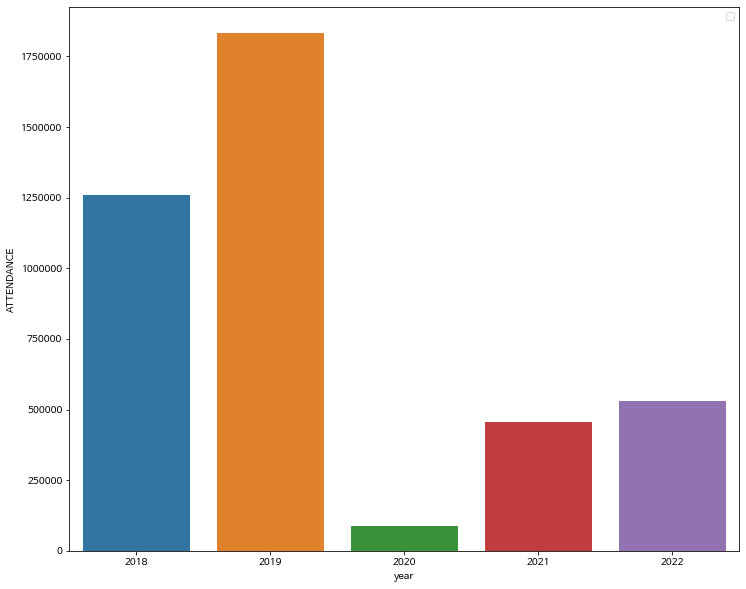

In [27]:
# 연도별 관중수 시각화

plt.rc('font', family='NanumBarunGothic') 


plt.figure(figsize=(12,10))
plt.legend(labels=KLEAGUE['year'])

x = KLEAGUE.groupby('year')['ATTENDANCE'].sum().keys()
y = KLEAGUE.groupby('year')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


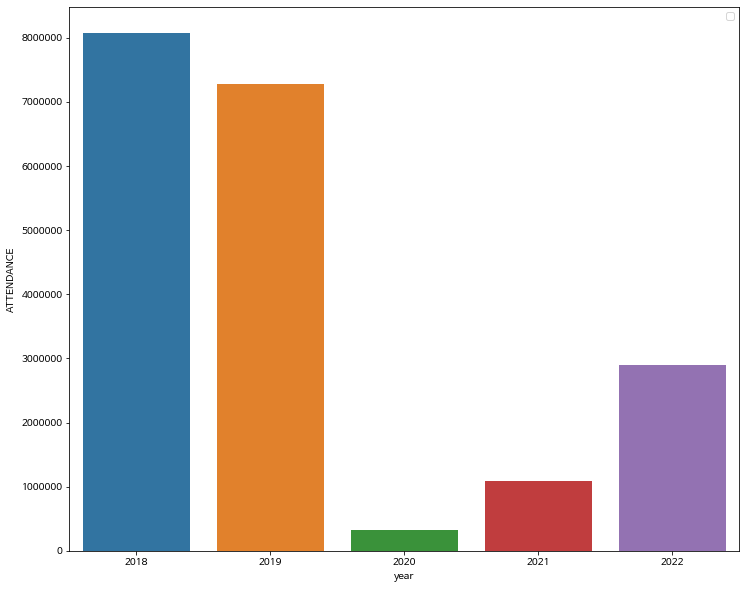

In [28]:
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(12, 10))

x = KBO.groupby('year')['ATTENDANCE'].sum().keys()
y = KBO.groupby('year')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
plt.legend(labels='year')
sns.barplot(x, y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


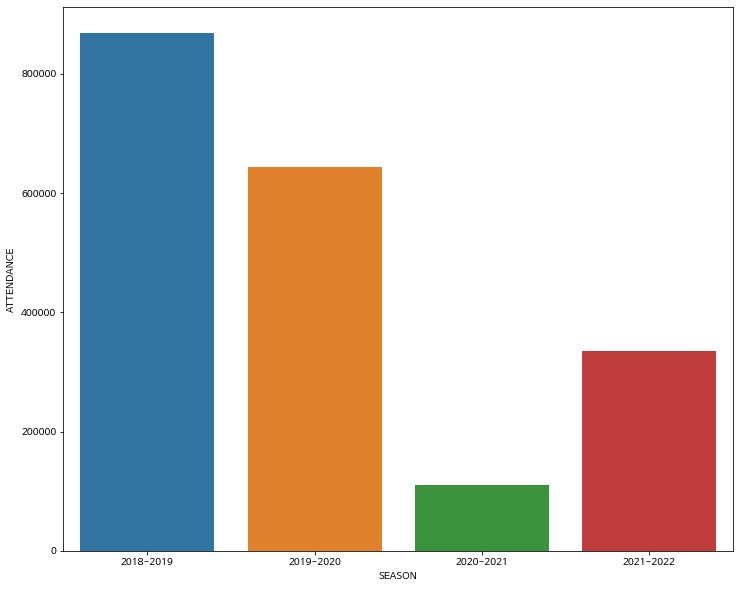

In [29]:
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(12, 10))

x = KBL.groupby('SEASON')['ATTENDANCE'].sum().keys()
y = KBL.groupby('SEASON')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


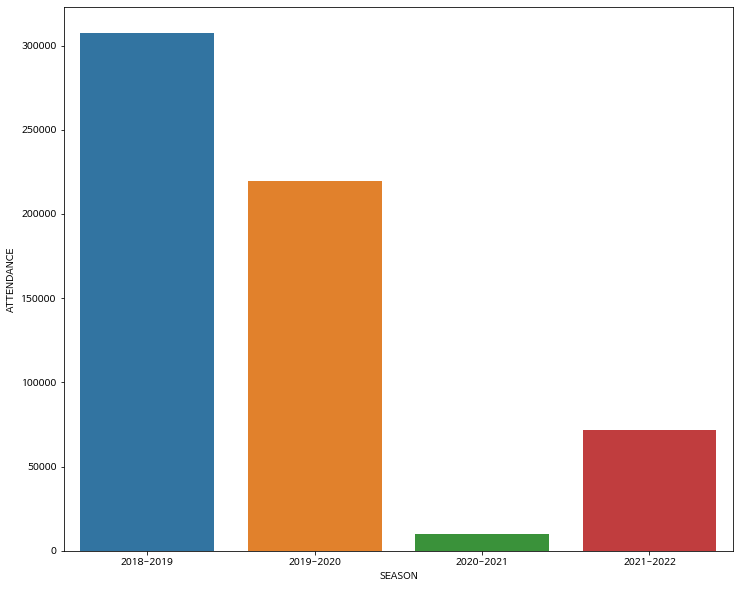

In [30]:
plt.rc('font', family='NanumBarunGothic') 


plt.figure(figsize=(12, 10))

x = MAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum().keys()
y = MAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


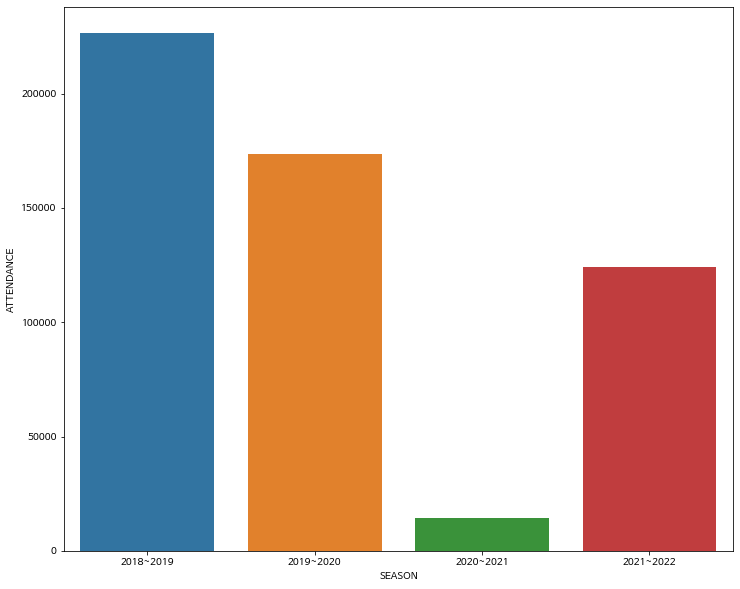

In [31]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(12, 10))

x = WOMAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum().keys()
y = WOMAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
sns.set(font_scale=2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


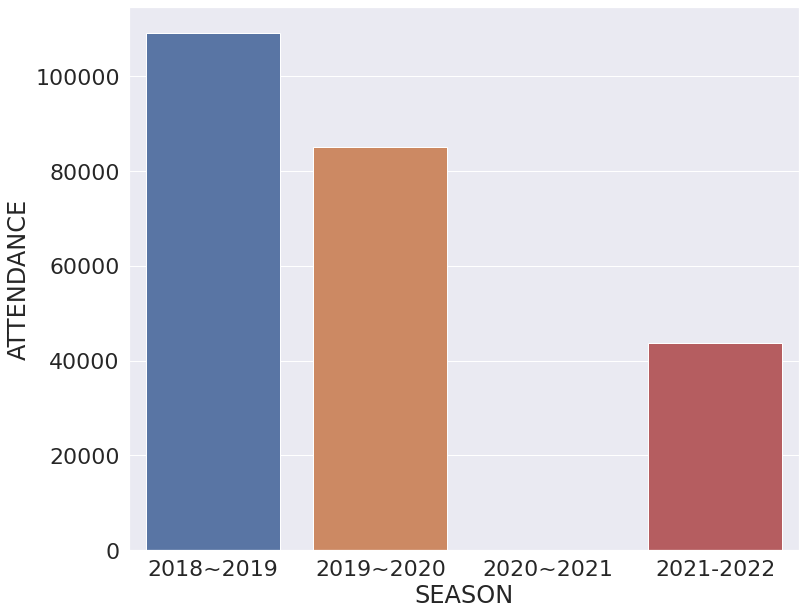

In [32]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(12, 10))

x = WKBL.groupby('SEASON')['ATTENDANCE'].sum().keys()
y = WKBL.groupby('SEASON')['ATTENDANCE'].sum()
sns.set(font_scale=2)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)

[Text(0, 0.5, '관중수'), Text(0.5, 0, '시즌')]

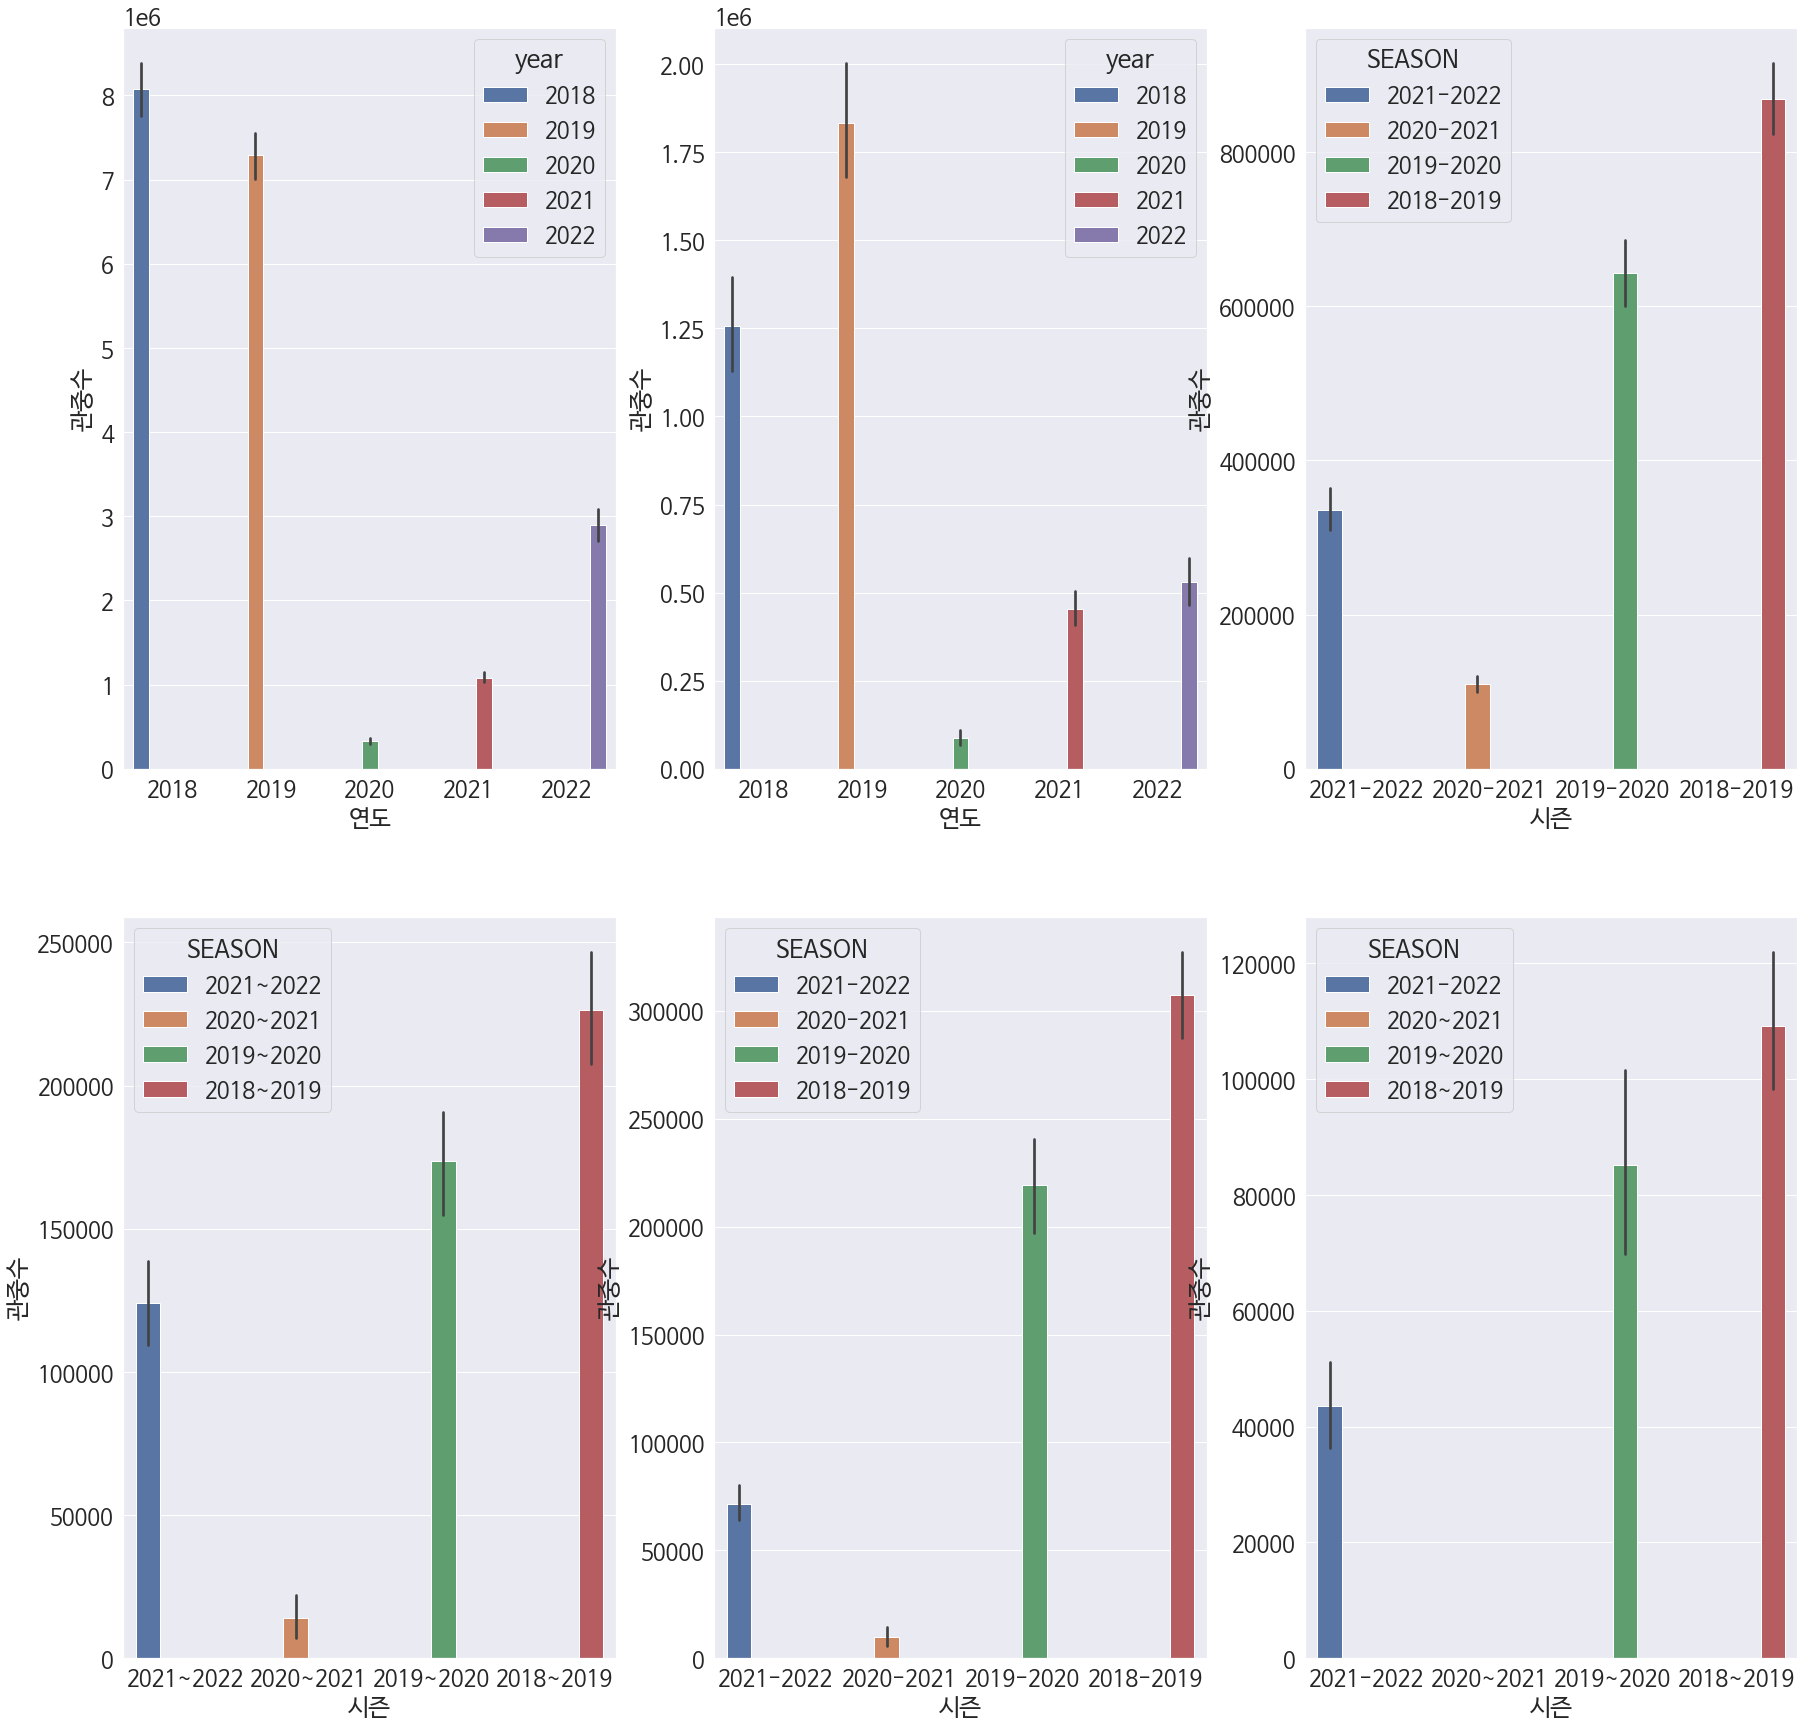

In [33]:
#2018~2022.7월 종목별 전체관중 현황 EDA
plt.rc('font', family='NanumBarunGothic') 
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30,30)

sns.barplot(data=KBO, x="year", y="ATTENDANCE", estimator=sum, ax=ax1,hue='year')
sns.barplot(data=KLEAGUE, x="year", y="ATTENDANCE", estimator=sum, ax=ax2,hue='year')
sns.barplot(data=KBL, x="SEASON", y="ATTENDANCE", estimator=sum, ax=ax3,hue='SEASON')
sns.barplot(data=WOMAN_KOVO, x="SEASON", y="ATTENDANCE",estimator=sum,ax=ax4,hue='SEASON')
sns.barplot(data=MAN_KOVO, x="SEASON", y="ATTENDANCE",estimator=sum,ax=ax5,hue='SEASON')
sns.barplot(data=WKBL, x="SEASON", y="ATTENDANCE",estimator=sum,ax=ax6,hue='SEASON')

plt.xticks()

ax1.set(xlabel='연도',ylabel='관중수')
ax2.set(xlabel='연도',ylabel='관중수')
ax3.set(xlabel='시즌',ylabel='관중수')
ax4.set(xlabel='시즌',ylabel='관중수')
ax5.set(xlabel='시즌',ylabel='관중수')
ax6.set(xlabel='시즌',ylabel='관중수')

**2018~2022년의 종목별 총관중수를 바 타입 차트로 시각화한 결과**


*   프로야구는 2018년 800만대를 돌파한 후, 지속적으로 감소 추세
*   프로축구(K리그) 역시 2019년 180만명을 돌파한 후 코로나 19 이슈와 맞물려, 관중입장 제한으로 인한 감소 추세


*   프로농구는 2018-2019 시즌 80만명대 관중 동원을 보여준 후, 2019-2020 시즌 코로나 19로 인한 조기종료와 인원제한이 맞물려 10만명대 미만으로 하락


*   여자농구는 2020-2021년 정규시즌 전경기 무관중 진행으로 해당 시즌 관중수 0을 기록
*   프로배구 남자부, 여자부 관중의 경우, 2021-22 시즌 종료 시점에서 여자부 전체관중이 남자부 전체관중을 추월








/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


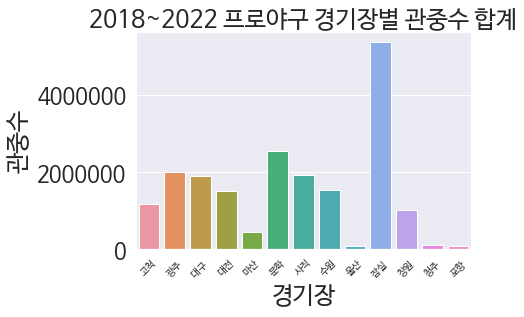

In [34]:
### 경기장별 관중 입장 합계 확인

plt.rc('font', family='NanumBarunGothic') 
x = KBO.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = KBO.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018~2022 프로야구 경기장별 관중수 합계')
plt.xticks(rotation=45,fontsize=10)

plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


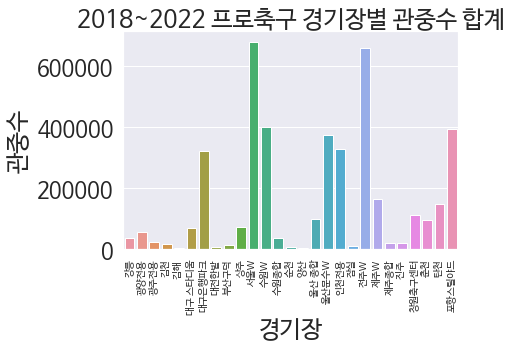

In [35]:
x = KLEAGUE.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = KLEAGUE.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018~2022 프로축구 경기장별 관중수 합계')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90,fontsize=10)
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


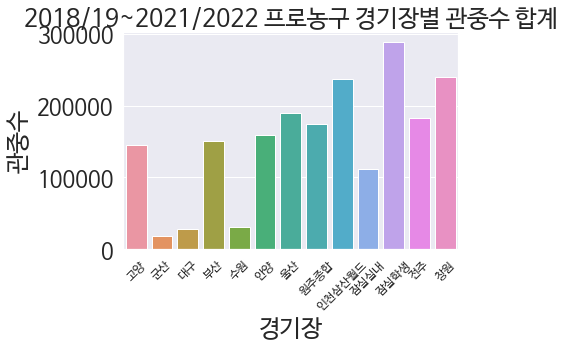

In [36]:
x = KBL.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = KBL.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018/19~2021/2022 프로농구 경기장별 관중수 합계')
plt.xticks(rotation=45,fontsize=12)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

## 대구의 경우 2021-22시즌부터 집계

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


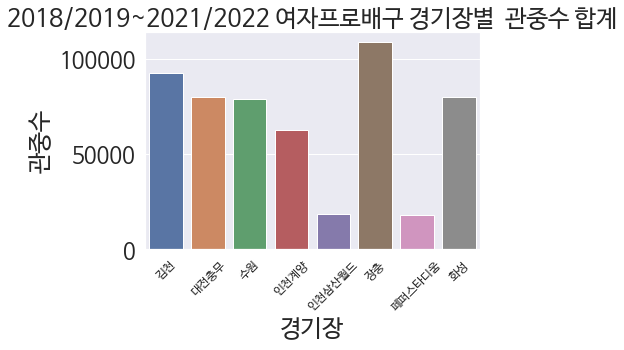

In [37]:
x = WOMAN_KOVO.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = WOMAN_KOVO.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018/2019~2021/2022 여자프로배구 경기장별  관중수 합계')
plt.xticks(rotation=45,fontsize=12)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

#광주의 경우 2021,2022년 집계

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


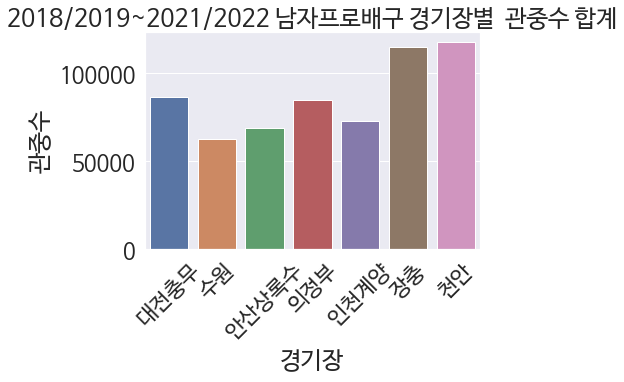

In [38]:
x = MAN_KOVO.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = MAN_KOVO.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018/2019~2021/2022 남자프로배구 경기장별  관중수 합계')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


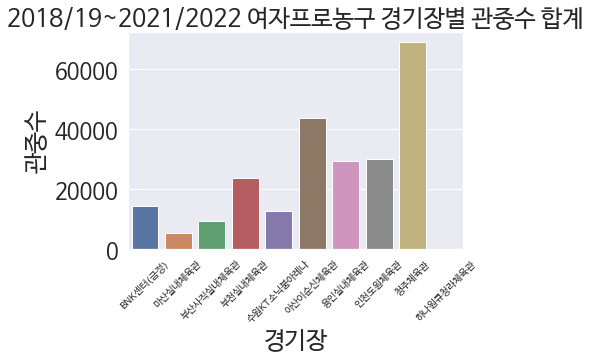

In [39]:

x = WKBL.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = WKBL.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018/19~2021/2022 여자프로농구 경기장별 관중수 합계')
plt.xticks(rotation=45,fontsize=10)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


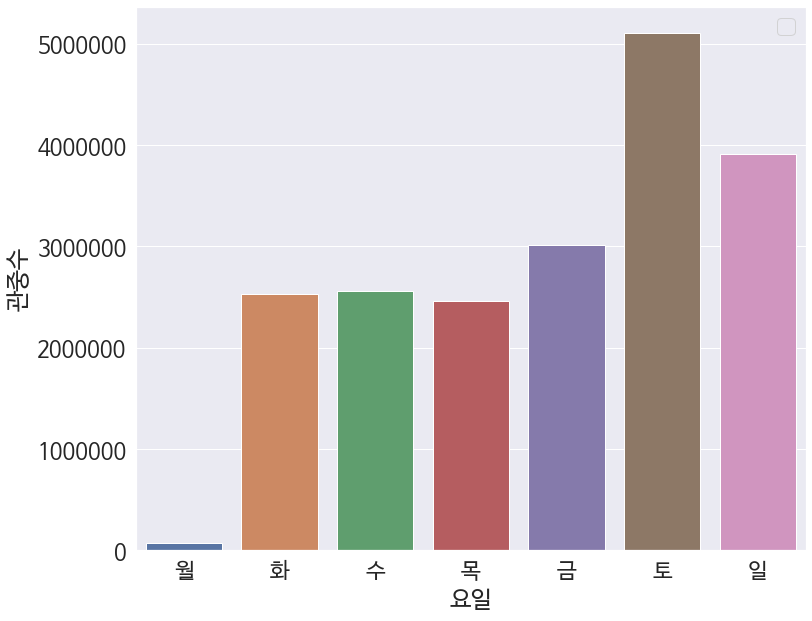

In [40]:
x = KBO.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = KBO.groupby('dayofweek')['ATTENDANCE'].sum()
plt.figure(figsize=(12, 10))
plt.legend(labels='day')
xlabel = ['월', '화', '수', '목', '금', '토', '일']




plt.ticklabel_format(style='plain')
ax = sns.barplot(x, y)
ax.set(xticklabels=xlabel)

plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


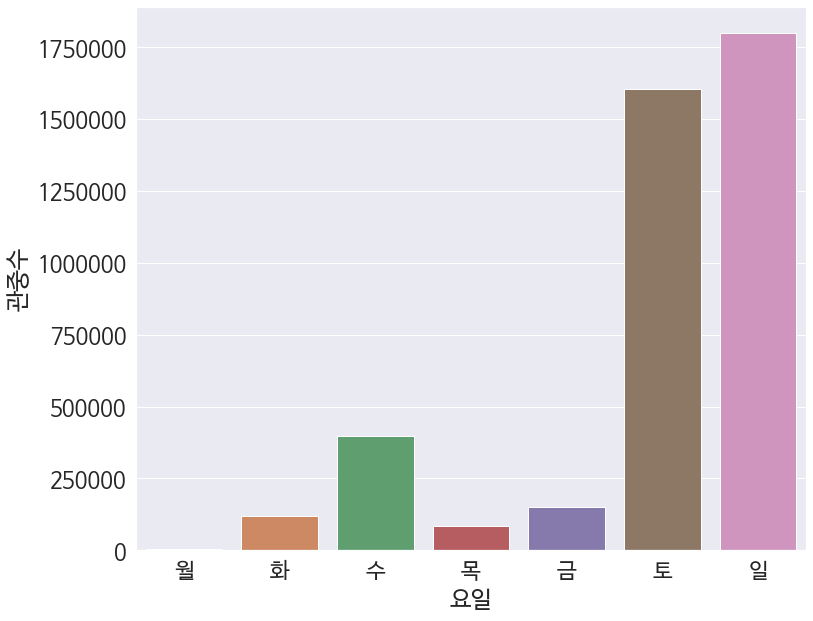

In [41]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 10))
x = KLEAGUE.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = KLEAGUE.groupby('dayofweek')['ATTENDANCE'].sum()



plt.ticklabel_format(style='plain')
ax = sns.barplot(x, y)
ax.set(xticklabels=xlabel)


plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


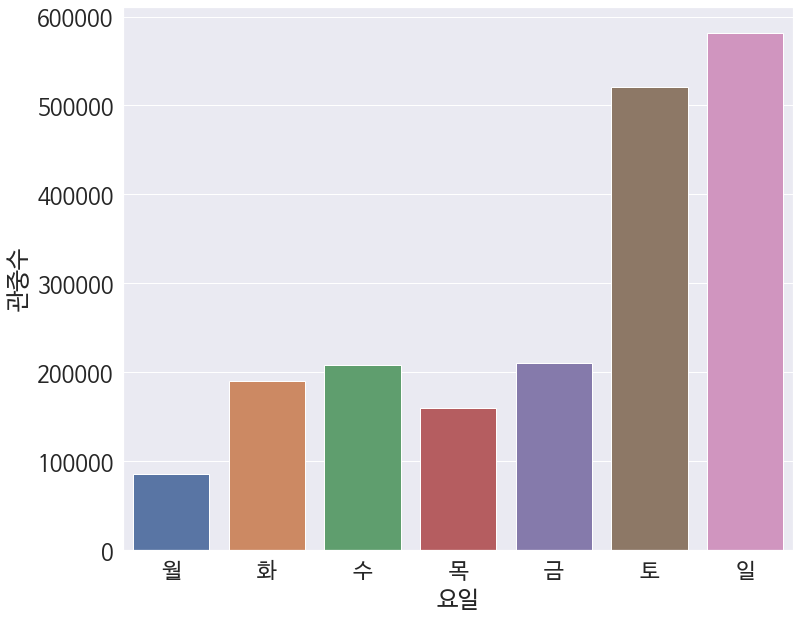

In [42]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 10))

x = KBL.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = KBL.groupby('dayofweek')['ATTENDANCE'].sum()


plt.ticklabel_format(style='plain')
ax=sns.barplot(x, y)
ax.set(xticklabels=xlabel)

plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


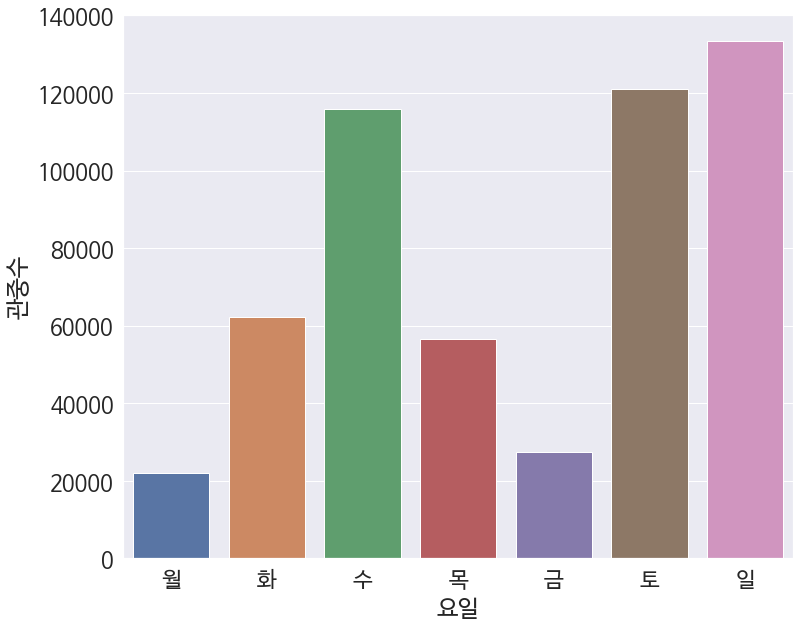

In [43]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 10))
x = WOMAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = WOMAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum()



plt.ticklabel_format(style='plain')
ax=sns.barplot(x, y)
ax.set(xticklabels=xlabel)

plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


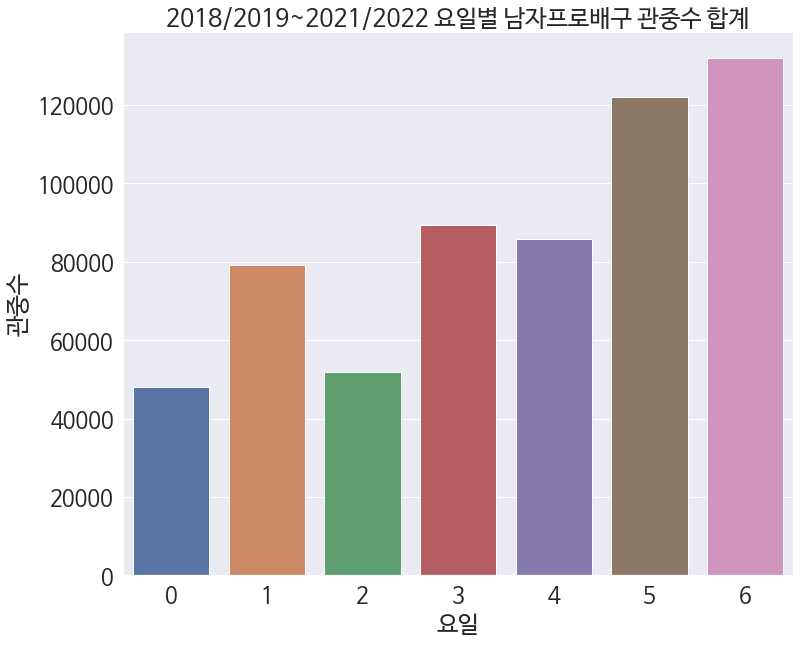

In [44]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 10))
x = MAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = MAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum()

plt.title('2018/2019~2021/2022 요일별 남자프로배구 관중수 합계')
plt.ticklabel_format(style='plain')
ax=sns.barplot(x, y)
ax.set(xticklabels=xlabel)

sns.barplot(x, y)
plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


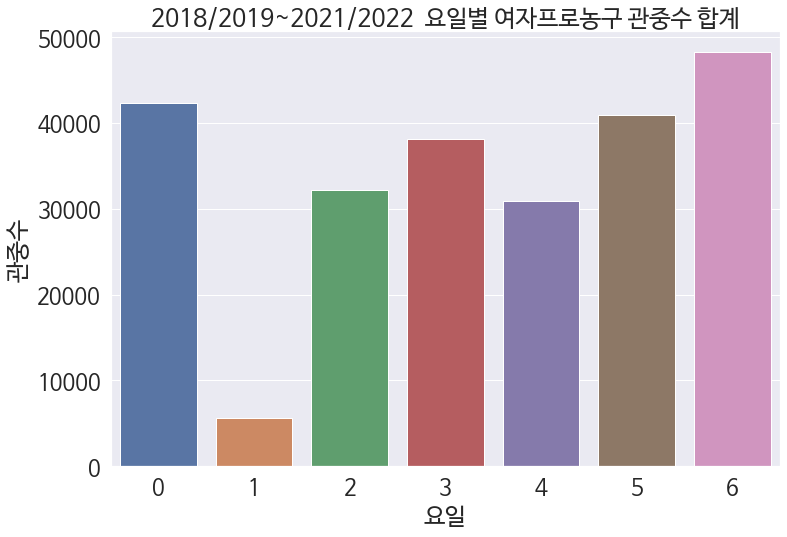

In [45]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 8))
x = WKBL.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = WKBL.groupby('dayofweek')['ATTENDANCE'].sum()


plt.title('2018/2019~2021/2022  요일별 여자프로농구 관중수 합계')
plt.ticklabel_format(style='plain')
ax=sns.barplot(x, y)
ax.set(xticklabels=xlabel)

sns.barplot(x, y)

plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

[Text(0, 0.5, '관중'),
 [Text(0, 0, '월'),
  Text(0, 0, '화'),
  Text(0, 0, '수'),
  Text(0, 0, '목'),
  Text(0, 0, '금'),
  Text(0, 0, '토'),
  Text(0, 0, '일')],
 Text(0.5, 0, '요일'),
 Text(0.5, 1.0, '프로농구(여자) 요일별 전체관중')]

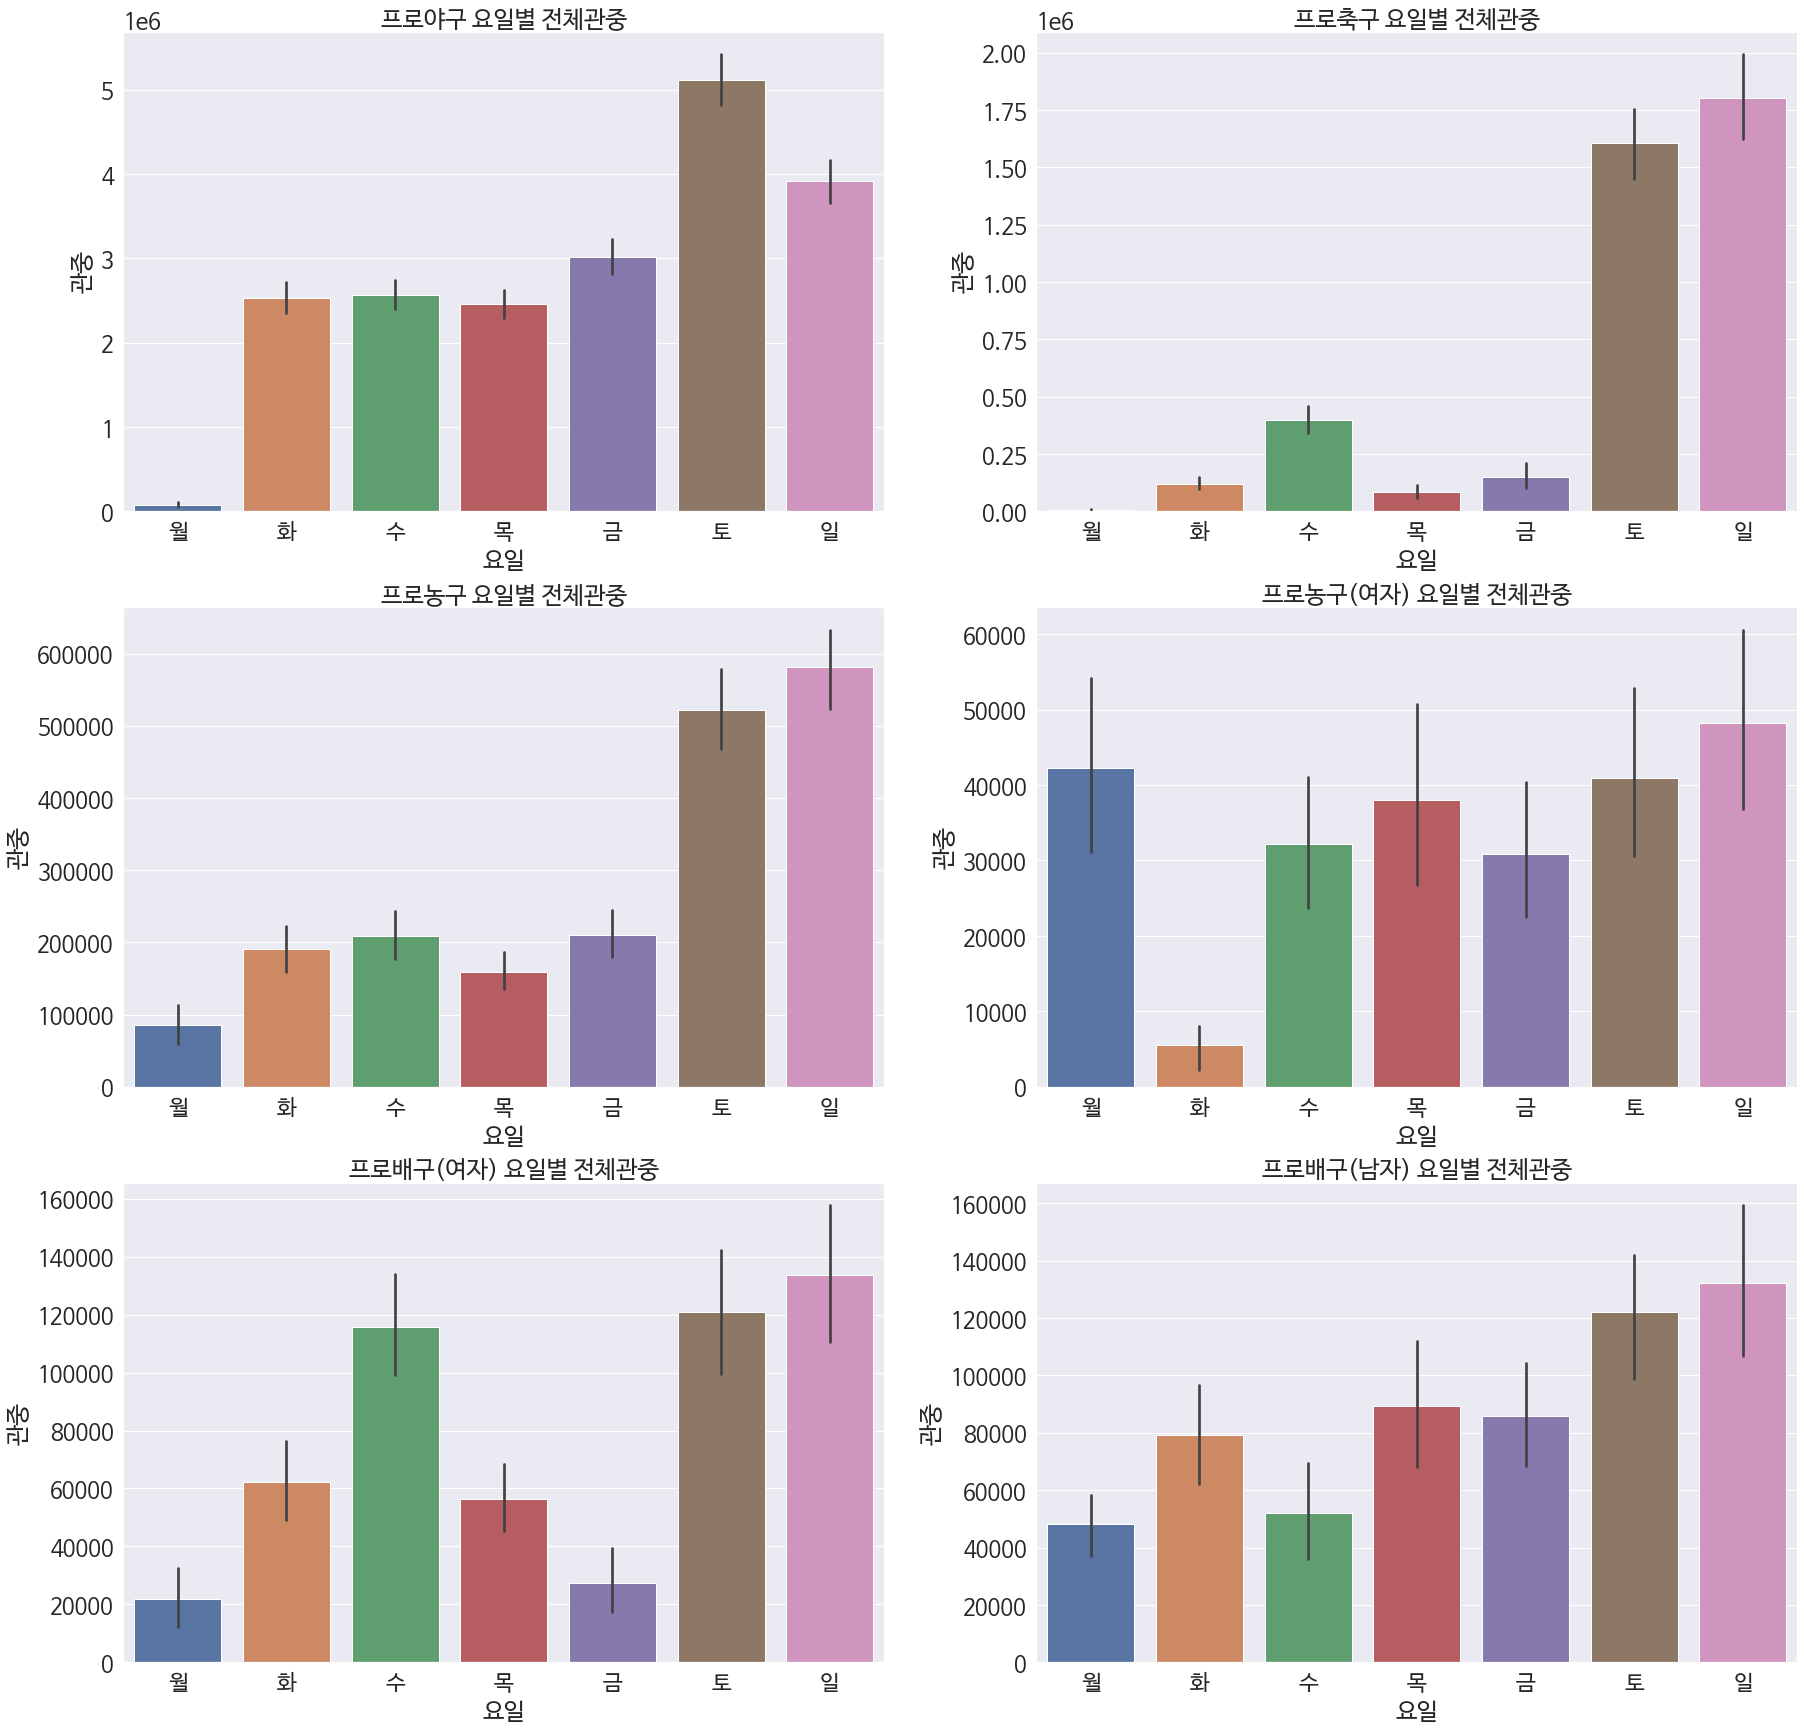

In [46]:
#종합적인 요일별 관중입장
figure, ((ax1,ax2),(ax3,ax6),(ax4,ax5)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(30,30)

sns.barplot(data=KBO, x="dayofweek", y="ATTENDANCE",estimator=sum, ax=ax1)
sns.barplot(data=KLEAGUE, x="dayofweek", y="ATTENDANCE",estimator=sum, ax=ax2)
sns.barplot(data=KBL, x="dayofweek", y="ATTENDANCE",estimator=sum, ax=ax3)
sns.barplot(data=WOMAN_KOVO, x="dayofweek", y="ATTENDANCE",estimator=sum,ax=ax4)
sns.barplot(data=MAN_KOVO, x="dayofweek", y="ATTENDANCE",estimator=sum,ax=ax5)
sns.barplot(data=WKBL, x="dayofweek", y="ATTENDANCE",estimator=sum,ax=ax6)

xlabel = ['월', '화', '수', '목', '금', '토', '일']


ax1.set(xlabel='요일',ylabel='관중', title="프로야구 요일별 전체관중",xticklabels=xlabel)
ax2.set(xlabel='요일',ylabel='관중',title="프로축구 요일별 전체관중",xticklabels=xlabel)
ax3.set(xlabel='요일',ylabel='관중',title="프로농구 요일별 전체관중",xticklabels=xlabel)
ax4.set(xlabel='요일',ylabel='관중', title="프로배구(여자) 요일별 전체관중",xticklabels=xlabel)
ax5.set(xlabel='요일',ylabel='관중', title="프로배구(남자) 요일별 전체관중",xticklabels=xlabel)
ax6.set(xlabel='요일',ylabel='관중', title="프로농구(여자) 요일별 전체관중",xticklabels=xlabel)


요일별로 전체관중현황을 종목별로 분류.

이를 평균관중현황으로 전체 종목을 합산했다.
(estimator 이용해 sum 함수로 변환, 전체 관중현황 데이터로)



*   프로야구의 경우 토요일 입장이 많음을 확인
*   프로축구는 목요일 평균관중이 많은 시각화 결과를 보여주는데, 전체 경기의 수가 수요일과 주말에 밀집된 것을 봤을 때 평균의 함정 문제가 제기된다.


*   프로농구와 남자, 여자프로배구는 주말 관중 수가 평균 및 전체관중 수에서 압도적인 비율을 차지한다.

**2018~2022 KBO리그(야구) 관중 입장 상관관계 EDA**

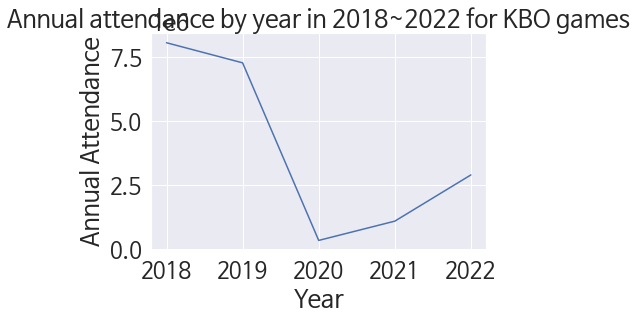

In [47]:
#관중 상관관계 선분석(프로야구)
from  matplotlib.ticker import FuncFormatter
grouped_year = pd.DataFrame(KBO.groupby('year').sum()).astype(int)

grouped_year['ATTENDANCE'] = grouped_year['ATTENDANCE'].astype(int)

plt.plot(grouped_year['ATTENDANCE'])
plt.xlabel('Year')
plt.ylabel('Annual Attendance')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))


plt.title('Annual attendance by year in 2018~2022 for KBO games')
plt.show()

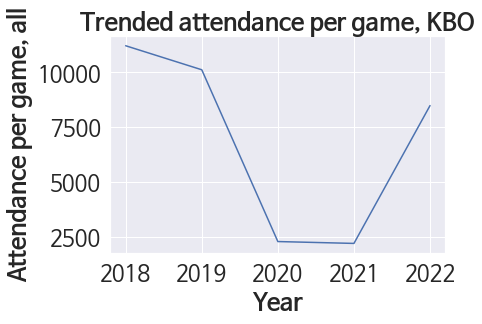

In [48]:
#경기당 관중 비율
from  matplotlib.ticker import FuncFormatter
grouped_year['attendance_per_game'] = grouped_year['ATTENDANCE'] / grouped_year['game'] #그룹화

plt.plot(grouped_year['attendance_per_game'])

plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per game, all',fontweight='bold')
plt.title('Trended attendance per game, KBO',fontweight='bold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.ylim()

plt.show()

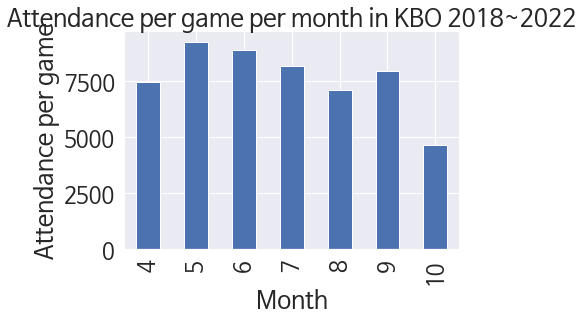

In [49]:
#월별 평균 관중입장

grouped_month = KBO.groupby(by=KBO.month).sum()
grouped_month = grouped_month[grouped_month.index != 3] # Exclude March because it's a smaller sample size
attendance_per_month = grouped_month['ATTENDANCE'] / grouped_month['game']

attendance_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Attendance per game')
plt.title('Attendance per game per month in KBO 2018~2022')

plt.show()

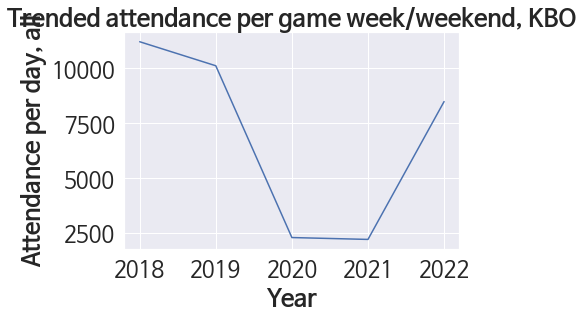

In [50]:
from  matplotlib.ticker import FuncFormatter
grouped_year['attendance_per_weekday/end'] = grouped_year['ATTENDANCE'] / grouped_year['is_weekend'] #그룹화

plt.plot(grouped_year['attendance_per_game'])

plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per day, all',fontweight='bold')
plt.title('Trended attendance per game week/weekend, KBO',fontweight='bold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.ylim()

plt.show()

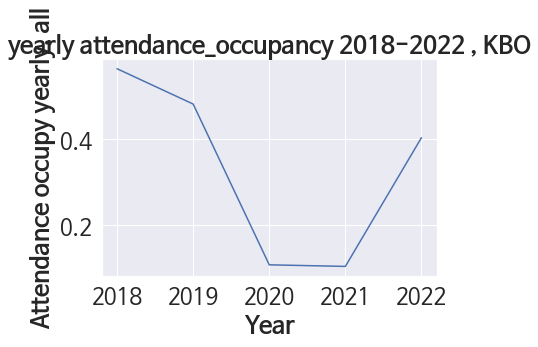

In [51]:
from  matplotlib.ticker import FuncFormatter
grouped_year['attendance_occupancy'] = grouped_year['ATTENDANCE'] / grouped_year['attendance_capacity'] #그룹화

plt.plot(grouped_year['attendance_occupancy'])
plt.plot(kind='density')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance occupy yearly, all',fontweight='bold')
plt.title('yearly attendance_occupancy 2018-2022 , KBO',fontweight='bold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.ylim()

plt.show()

# 경기당 평균관중과 주말/평일 구분 평균관중 상관관계(프로야구)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


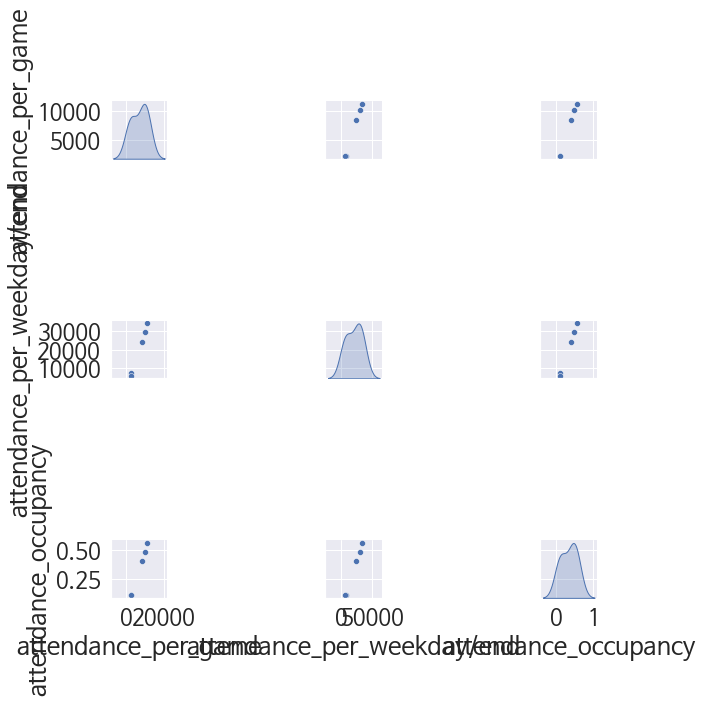

In [52]:
corr_columns = ['attendance_per_game','attendance_per_weekday/end','attendance_occupancy']

sns.pairplot(grouped_year[corr_columns], diag_kind = 'kde',size=3)

plt.show()

In [53]:
# 연, 월로 된 그룹화
df_m_y = pd.DataFrame(KBO.groupby(by=[KBO.year, KBO.month]).sum())

In [54]:
df_m_y['attendance_per_game'] = df_m_y['ATTENDANCE'] / df_m_y['game']
df_m_y['attendance_per_weekday/end']=  df_m_y['ATTENDANCE'] / df_m_y['is_weekend']
df_m_y['attendance_occupancy']=df_m_y['ATTENDANCE']/df_m_y['attendance_capacity']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


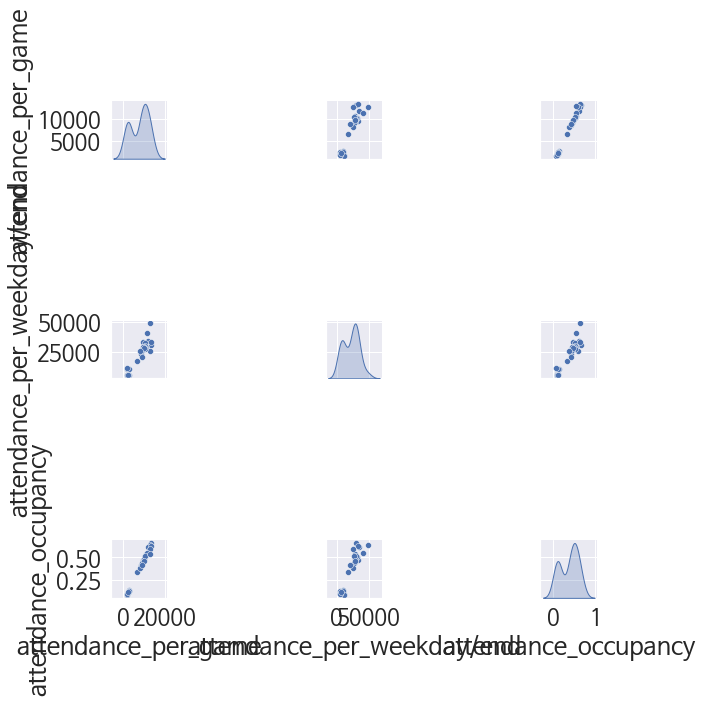

In [55]:
sns.pairplot(df_m_y[corr_columns], diag_kind = 'kde',size=3)

plt.show()

# 팀별 홈경기 평균관중 분석(프로야구)

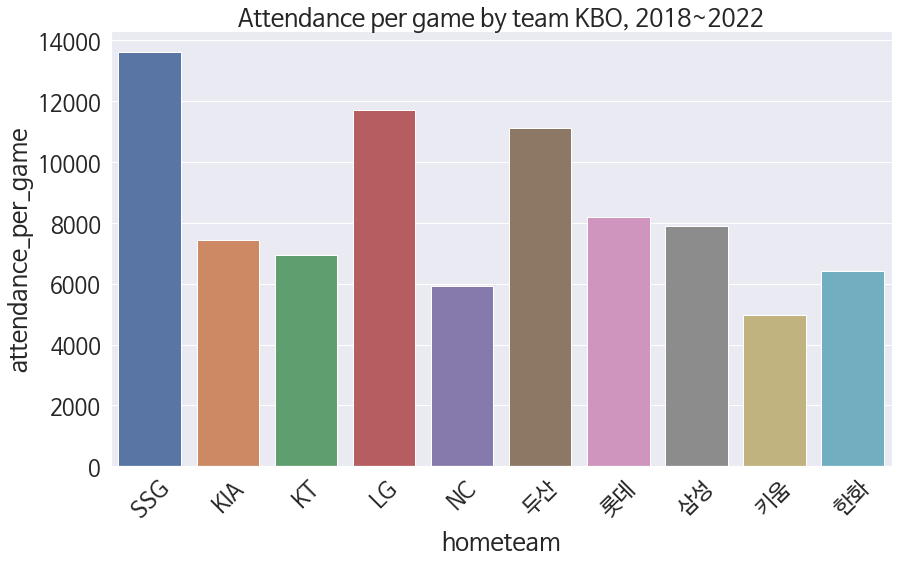

In [56]:
#팀당 홈경기 기준 평균관중 분석

## Create a dataframe grouped by team and see how average attendance per game changes per team
plt.rc('font', family='NanumBarunGothic') 
df_teams = pd.DataFrame(KBO[['hometeam','ATTENDANCE','game']].groupby(by='hometeam').sum())
df_teams['attendance_per_game'] = df_teams['ATTENDANCE'] / df_teams['game']
df_teams= df_teams[df_teams.index != 'SSG'] #SSG 중복컬럼

fig = plt.figure(figsize=(14, 8))

ax= sns.barplot(x=df_teams.index, y='attendance_per_game', data=df_teams)

plt.xticks(rotation=45)
plt.title('Attendance per game by team KBO, 2018~2022')

plt.show()

데이터 중복 문제로 SSG 랜더스 팀의 컬럼이 두 개로 나오는 현상을 해결.

2018~2022년 기준으로 팀별 평균관중 입장에서 LG 트윈스, 두산 베어스, SSG 랜더스가 상위 관중 3팀을 차지했다.

# 2018~2022 K리그(축구) 관중 상관관계 EDA

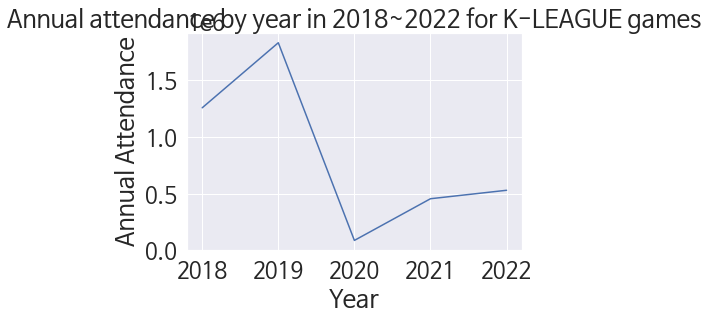

In [57]:
#프로축구 2018~2022 관중 상관관계
from  matplotlib.ticker import FuncFormatter
grouped_year = pd.DataFrame(KLEAGUE.groupby('year').sum())

grouped_year['ATTENDANCE'] = grouped_year['ATTENDANCE'].astype(int)

plt.plot(grouped_year['ATTENDANCE'])
plt.xlabel('Year')
plt.ylabel('Annual Attendance')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.title('Annual attendance by year in 2018~2022 for K-LEAGUE games')


plt.show()



*   앞에서 확인했지만, 2018~2022 프로축구 연간 관중수를 선형으로 표현하면 다음과 같다.
*   2018~2022년 기준으로 2019년 184만명의 관중이 입장했고, 코로나 19 이후 급격한 감소를 보였다가 2022년 관중 입장 제한이 풀리면서 완만한 증가를 보여준다.



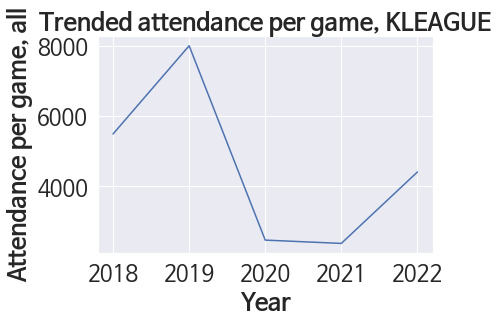

In [58]:
grouped_year['attendance_per_game'] = grouped_year['ATTENDANCE'] / grouped_year['game'] #그룹화
from  matplotlib.ticker import FuncFormatter
plt.plot(grouped_year['attendance_per_game'])


plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per game, all',fontweight='bold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.title('Trended attendance per game, KLEAGUE',fontweight='bold')
plt.ylim()

plt.show()

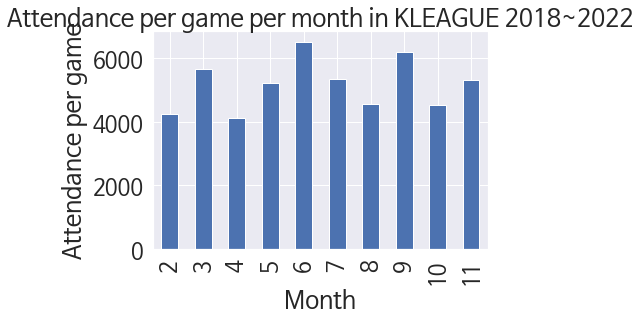

In [59]:
#월별 평균 관중인원
grouped_month = KLEAGUE.groupby(by=KLEAGUE.month).sum()
grouped_month = grouped_month[grouped_month.index != 12] # Exclude December because it's a smaller sample size
attendance_per_month = grouped_month['ATTENDANCE'] / grouped_month['game']

attendance_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Attendance per game')
plt.title('Attendance per game per month in KLEAGUE 2018~2022')

plt.show()

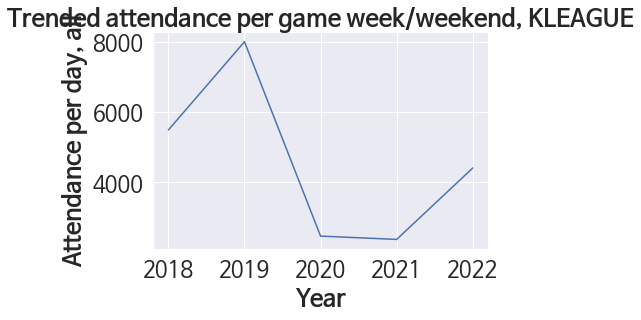

In [60]:
grouped_year['attendance_per_weekday/end'] = grouped_year['ATTENDANCE'] / grouped_year['is_weekend'] #그룹화

plt.plot(grouped_year['attendance_per_game'])

from  matplotlib.ticker import FuncFormatter
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per day, all',fontweight='bold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.title('Trended attendance per game week/weekend, KLEAGUE',fontweight='bold')
plt.ylim()

plt.show()

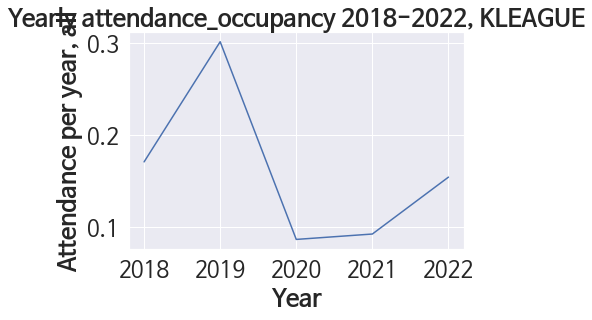

In [61]:
grouped_year['attendance_per_occupy'] = grouped_year['ATTENDANCE'] / grouped_year['attendance_capacity']
plt.plot(grouped_year['attendance_per_occupy'])
plt.plot(kind='density')

from  matplotlib.ticker import FuncFormatter
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per year, all',fontweight='bold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.title('Yearly attendance_occupancy 2018-2022, KLEAGUE',fontweight='bold')
plt.ylim()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


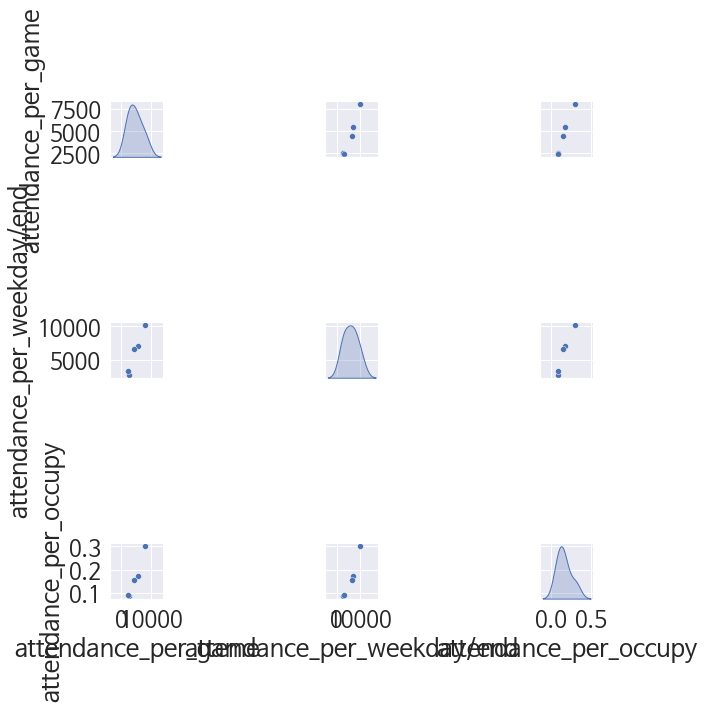

In [62]:
corr_columns = ['attendance_per_game','attendance_per_weekday/end','attendance_per_occupy']

sns.pairplot(grouped_year[corr_columns], diag_kind = 'kde',size=3)

plt.show()

In [63]:
# 연, 월로 된 그룹화
df_m_y = pd.DataFrame(KLEAGUE.groupby(by=[KLEAGUE.year, KLEAGUE.month]).sum())

In [64]:
df_m_y['attendance_per_game'] = df_m_y['ATTENDANCE'] / df_m_y['game']
df_m_y['attendance_per_weekday/end']=  df_m_y['ATTENDANCE'] / df_m_y['is_weekend']
df_m_y['attendance_per_occupy']=df_m_y['ATTENDANCE']/df_m_y['attendance_capacity']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


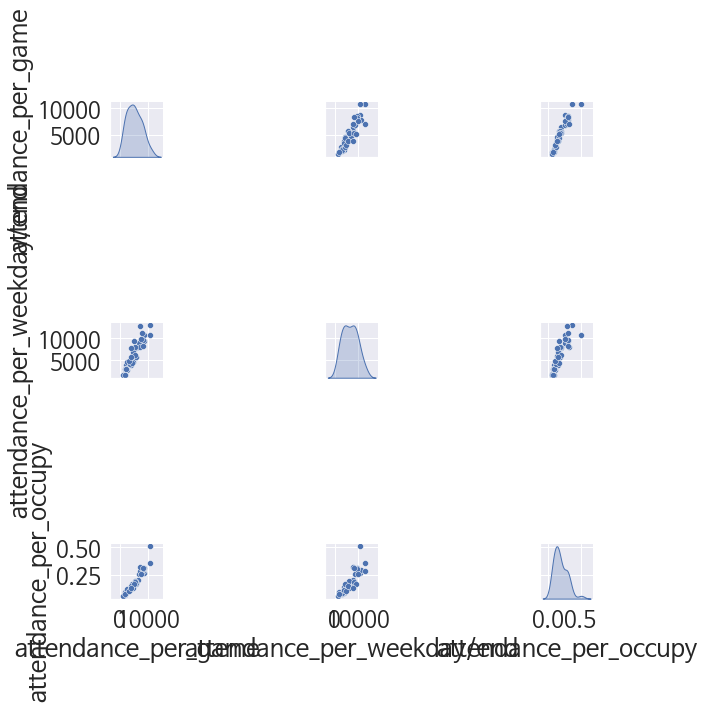

In [65]:
sns.pairplot(df_m_y[corr_columns], diag_kind = 'kde',size=3)

plt.show()

경기당 평균관중입장, 좌석점유율, 평일 및 주말 입장평균을 시각화로 표현했을때, 프로축구(K리그) 관중은 양의 방향으로 분포됨을 확인

좌석 점유율의 경우 분포가 0.2 ~ 0.3대로 나타나며, 보통 5000~8000명대의 입장 분포를 보여주고 있다.

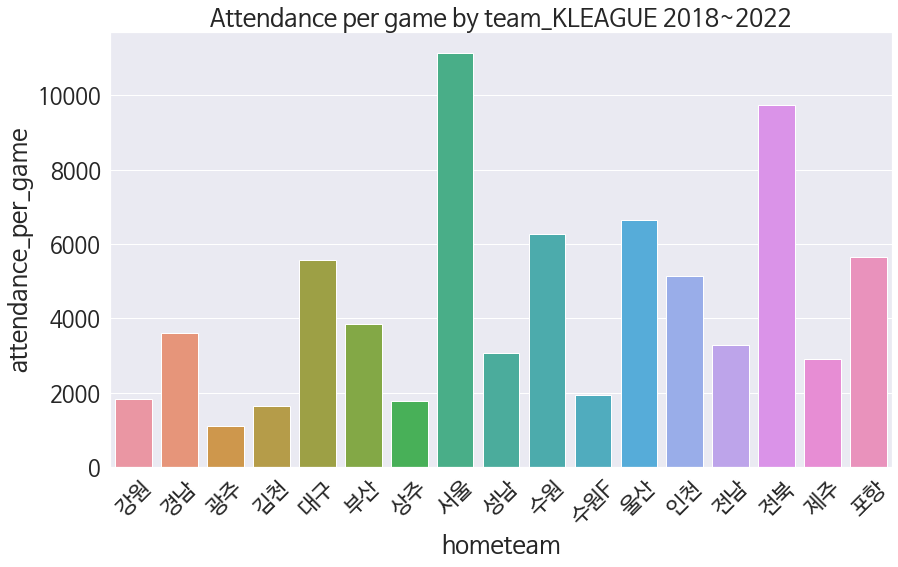

In [66]:
#팀당 홈경기 기준 평균관중 분석

## Create a dataframe grouped by team and see how average attendance per game changes per team
plt.rc('font', family='NanumBarunGothic') 
df_teams = pd.DataFrame(KLEAGUE[['hometeam','ATTENDANCE','game']].groupby(by='hometeam').sum())
df_teams['attendance_per_game'] = df_teams['ATTENDANCE'] / df_teams['game']
df_teams= df_teams[df_teams.index != '대전'] #대전의 경우 승격플레이오프 외에 1부리그팀과 해당 기간 경기 없었음

fig = plt.figure(figsize=(14, 8))

ax= sns.barplot(x=df_teams.index, y='attendance_per_game', data=df_teams)

plt.xticks(rotation=45)
plt.title('Attendance per game by team_KLEAGUE 2018~2022')

plt.show()

대전은 2021년 승강플레이오프 이외 1부리그 팀과 경기가 없었기 때문에, 대상에서 제외


평균 홈관중 동원에서 FC서울, 전북현대, 울산현대 순으로 나타났다.

대구의 경우 수원삼성과 비슷한 평균관중인원을 보이는데, 경기장 이전 후 전용구장 효과로 인한 관중동원력에서 증가 추세를 보이고 있다.

# 전체 상관관계 결론(프로야구)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


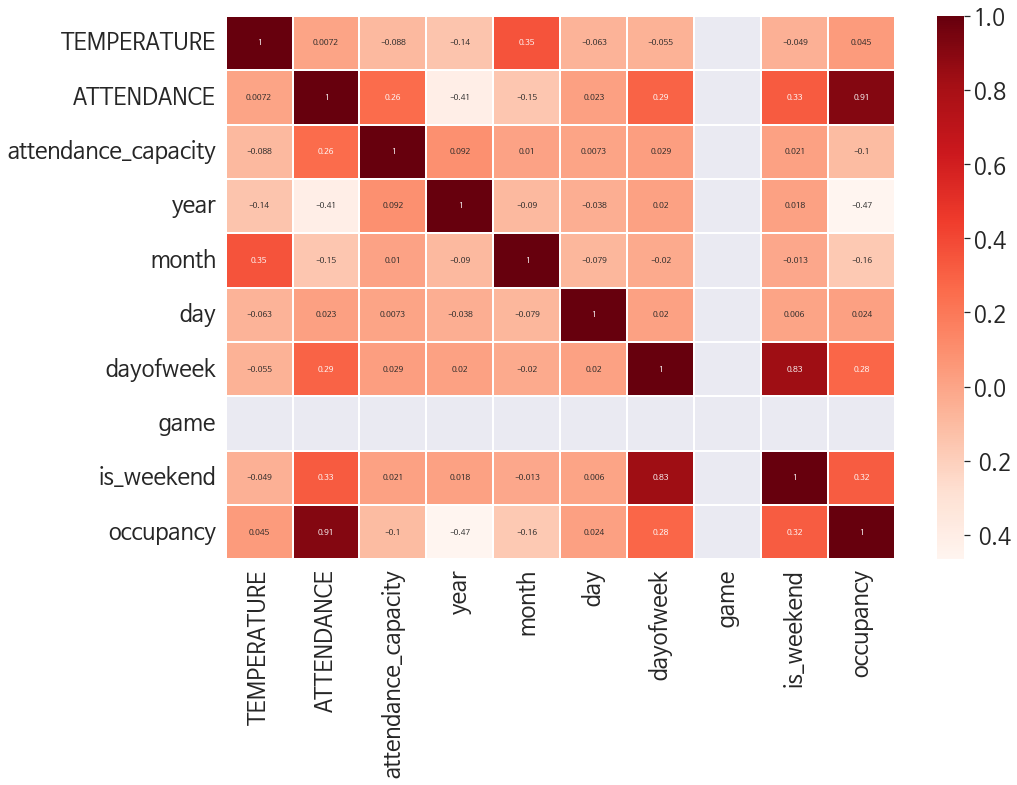

In [67]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(KBO.corr(),cmap="Reds",annot=True,linewidths=1,annot_kws={"size":8})

In [68]:
KBO.corr()['ATTENDANCE']

TEMPERATURE            0.007247
ATTENDANCE             1.000000
attendance_capacity    0.257850
year                  -0.406101
month                 -0.153580
day                    0.023191
dayofweek              0.290341
game                        NaN
is_weekend             0.329512
occupancy              0.911919
Name: ATTENDANCE, dtype: float64

프로야구 관중 상관관계를 데이터 기준으로 분석했을때, 주말/평일 변수가 가장 높았다. 반면 연도, 월 상관관계는 음의 값으로 나타나는데 기온과의 상관관계를 보고 싶어했던 입장에서 이 부분에서 수정이 필요하다.

기온 및 관중 간 상관관계는 음의 값으로 표현되었다.

- 수정 완료(실수형으로 변환 후 회귀분석 진행) 

# K리그(프로축구) 전체 상관관계 결론

In [69]:
KLEAGUE.corr()['ATTENDANCE']
KLEAGUE.drop(['game'],axis=1)


,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,is_weekend,occupancy
0,2018-03-01,목,제주,서울,제주W,맑음,7.300000,4979.0,29790,2018,3,1,3,0,0.167137
1,2018-03-01,목,수원,전남,수원W,맑음,-3.600000,8456.0,43923,2018,3,1,3,0,0.192519
2,2018-03-01,목,전북,울산,전주W,맑음,3.000000,17188.0,36780,2018,3,1,3,0,0.467319
3,2018-03-03,토,강원,인천,춘천,맑음,11.600000,4530.0,20000,2018,3,3,5,1,0.226500
4,2018-03-03,토,포항,대구,포항스틸야드,맑음,9.900000,14584.0,15170,2018,3,3,5,1,0.961371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2022-07-05,화,김천,제주,김천,흐림,32.900002,557.0,25000,2022,7,5,1,0,0.022280
967,2022-07-05,화,울산,강원,울산문수W,구름많음,30.000000,3344.0,43554,2022,7,5,1,0,0.076778
968,2022-07-06,수,수원,대구,수원W,비,34.500000,2231.0,43923,2022,7,6,2,0,0.050793
969,2022-07-06,수,서울,전북,서울W,비,33.299999,8537.0,66704,2022,7,6,2,0,0.127983


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


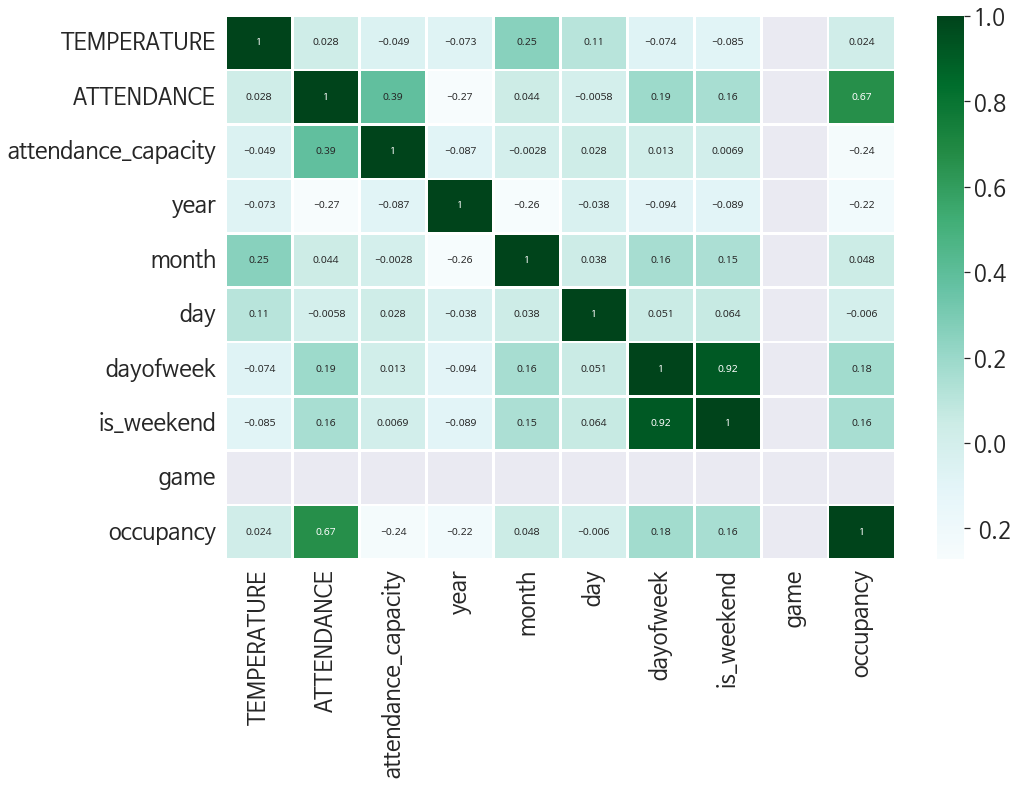

In [70]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(KLEAGUE.corr(),cmap="BuGn",annot=True,linewidths=1.5,annot_kws={"size":10})


프로축구의 경우 경기장 수용인원과 관중 상관관계가 0.3으로 나타남. 반면, 요일 및 평일/주말 구분 변수는 0.12~0.14대로 예상에 비해 상관관계가 적음을 보임

#기온 및 관중 선형회귀 분석 진행(프로야구, 프로축구)

프로야구의 경기당 관중과 기온 간 상관관계: 0.01


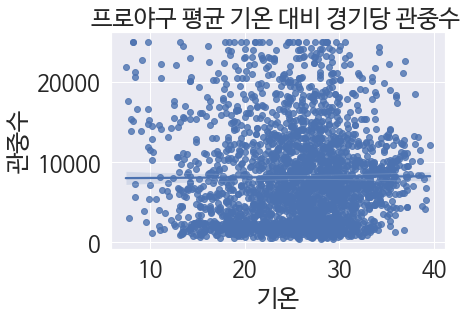

In [71]:
#기온과 관중수간 선형분석
KBO['attendance_per_game'] = KBO['ATTENDANCE'] / KBO['game'] ##경기당 입장 수

plt.rc('font',family='NanumBarunGothic')
ax = sns.regplot(x="TEMPERATURE", y='attendance_per_game', data = KBO)
sns.set(font_scale=2, style='darkgrid')
plt.title('프로야구 평균 기온 대비 경기당 관중수 ')

plt.xlabel('기온')
plt.ylabel('관중수')
print('프로야구의 경기당 관중과 기온 간 상관관계: %.2f' % KBO[['TEMPERATURE', 'attendance_per_game']].corr().iloc[0,1])

프로축구 경기당 관중과 기온 간 상관관계: 0.03


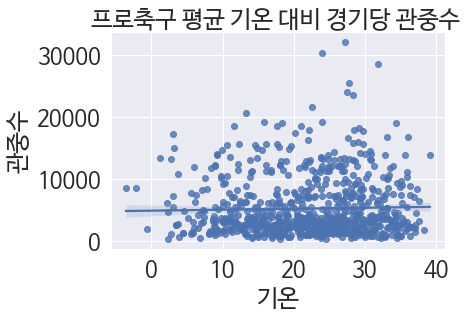

In [72]:
KLEAGUE['attendance_per_game'] = KLEAGUE['ATTENDANCE'] / KLEAGUE['game'] ##경기당 입장 수

plt.rc('font',family='NanumBarunGothic')
ax=sns.regplot(x="TEMPERATURE", y='attendance_per_game', data=KLEAGUE)
sns.set(font_scale=2, style='darkgrid')
plt.title('프로축구 평균 기온 대비 경기당 관중수 ')

plt.xlabel('기온')
plt.ylabel('관중수')
print('프로축구 경기당 관중과 기온 간 상관관계: %.2f' % KLEAGUE[['TEMPERATURE', 'attendance_per_game']].corr().iloc[0,1])

# 관중예측 모델 구축(프로야구)

In [73]:
## 모델 개발을 위한 전처리
KBO.isna().sum()

DATE                   0
DAY                    0
hometeam               0
awayteam               0
STADIUM                0
WEATHER                0
TEMPERATURE            0
ATTENDANCE             0
attendance_capacity    0
year                   0
month                  0
day                    0
dayofweek              0
game                   0
is_weekend             0
occupancy              0
attendance_per_game    0
dtype: int64

In [74]:
## 라벨 인코딩, 더미변수 통한 범주형 변수 수치화
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()






weather_dummies=pd.get_dummies(KBO['WEATHER'])
team_dummies=pd.get_dummies(KBO['hometeam'])
KBO=pd.concat([KBO,weather_dummies,team_dummies], axis=1)
KBO.head()



KBO.drop(['DAY'],axis=1)
KBO.drop(['occupancy'],axis=1)
KBO.drop(['STADIUM'],axis=1)

,DATE,DAY,hometeam,awayteam,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,...,KIA,KT,LG,NC,SSG,두산,롯데,삼성,키움,한화
0,2022-07-06,수,한화,NC,흐림,35.4,2726.0,12000,2022,7,...,0,0,0,0,0,0,0,0,0,1
1,2022-07-06,수,KIA,KT,구름많음,34.5,6269.0,20500,2022,7,...,1,0,0,0,0,0,0,0,0,0
2,2022-07-06,수,삼성,LG,비,33.8,4673.0,24000,2022,7,...,0,0,0,0,0,0,0,1,0,0
3,2022-07-06,수,SSG,롯데,구름많음,33.2,6859.0,23000,2022,7,...,0,0,0,0,0,0,0,0,0,0
4,2022-07-06,수,두산,키움,비,33.3,2930.0,25000,2022,7,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,2018-03-24,토,NC,LG,맑음,19.4,11000.0,11000,2018,3,...,0,0,0,1,0,0,0,0,0,0
3035,2018-03-24,토,두산,삼성,구름많음,13.1,25000.0,25000,2018,3,...,0,0,0,0,0,1,0,0,0,0
3036,2018-03-24,토,SSG,롯데,흐림,8.2,25000.0,23000,2018,3,...,0,0,0,0,1,0,0,0,0,0
3037,2018-03-24,토,KIA,KT,구름조금,17.8,20500.0,20500,2018,3,...,1,0,0,0,0,0,0,0,0,0


In [75]:
KBO.dtypes

DATE                   datetime64[ns]
DAY                            object
hometeam                       object
awayteam                       object
STADIUM                        object
WEATHER                        object
TEMPERATURE                   float64
ATTENDANCE                    float64
attendance_capacity             int64
year                            int64
month                           int64
day                             int64
dayofweek                       int64
game                            int64
is_weekend                      int64
occupancy                     float64
attendance_per_game           float64
구름많음                            uint8
구름조금                            uint8
맑음                              uint8
비                               uint8
흐림                              uint8
 SSG                            uint8
KIA                             uint8
KT                              uint8
LG                              uint8
NC          

In [77]:
## 후진 소거법
import statsmodels.api as sm
variables=KBO.columns[:-2].tolist() ##설명변수 리스트

y=KBO['attendance_per_game']
selected_variables=variables
sl_remove=0.05

sv_per_stop=[] ##스텝별 선택된 변수들
adjusted_r_squared=[] ##스텝별 수정된 결정계수
steps=[] 
step=0

while len(selected_variables) > 0:
    X = sm.add_constant(KBO[selected_variables+[col]])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(KBO[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

NameError: ignored

In [78]:
selected_variables

['DATE',
 'DAY',
 'hometeam',
 'awayteam',
 'STADIUM',
 'WEATHER',
 'TEMPERATURE',
 'ATTENDANCE',
 'attendance_capacity',
 'year',
 'month',
 'day',
 'dayofweek',
 'game',
 'is_weekend',
 'occupancy',
 'attendance_per_game',
 '구름많음',
 '구름조금',
 '맑음',
 '비',
 '흐림',
 ' SSG',
 'KIA',
 'KT',
 'LG',
 'NC',
 'SSG',
 '두산',
 '롯데',
 '삼성']

In [79]:
#선형회귀 코드 입력 및 테스트, 실행 모델
from sklearn.linear_model import LinearRegression, Lasso ,Ridge
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split #훈련세트 분리

In [80]:
y=KBO['attendance_per_game'] ## 종속변수= 경기당 관중

In [81]:
x_b=KBO[['year','month','day','dayofweek','두산','TEMPERATURE']] ## 독립변수= 홈팀, 기온, 경기장 수용인원, 연월일, 주말 및 평일 가변수

In [82]:
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error as mae # mae 코드 호출

X = scale(x_b) # 변수를 일반적인 크기로 조정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 15) ##테스트셋, 훈련셋 70:30으로 분리

linreg_scale = LinearRegression()

linreg_scale.fit(X_train, y_train)

preds = linreg_scale.predict(X_test)
print(preds) ## 예측값 출력


[ 7311.81515463  9739.6449764   6885.77635362  1002.96008402
 12459.77731417  8824.77464226  5626.41134859  6031.81175607
  5950.74331439  6843.92876131  8717.44708835  6009.82298469
  8273.81415494  2507.74015061  8795.92163661 13815.78770528
  5799.09493664 14805.5556179   1391.88639909 12536.08642975
  9564.24130373 10444.62450273 10227.65108174 10784.45835844
  8821.56674075  9900.75690406  6561.61895111  8494.79949917
  6814.26537312 13608.27783421  5223.97618971 11535.29145172
  7389.96423172  4255.80090397 12184.49205002  2448.17976913
  3399.60013529  6456.43685937  3265.49105394 12976.18401789
 10711.49328545  6471.04631678  9490.9709054   2009.90142708
  7099.5251337  11247.6897226  12605.11463396  4247.42579912
 10203.48585729  8857.15197279  4994.91326399 11592.92223324
  8116.48450329 10998.65959464  9321.64856581 12923.46208348
  7930.68386547  6319.99101317  4960.69999682 12053.9313866
 10234.51506807  4518.70136055  6001.49265576  4159.51028582
  5909.30288695  9299.820

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1689, 6), (725, 6), (1689,), (725,))

In [84]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(preds, columns=['preds']).to_csv('KBO_prediction.csv')

In [85]:
mae_linreg_s = mae(y_test, preds)

print('MAE (Mean Absolute Error)를 통한 평가지표 값: %.2f' %mae_linreg_s) ## MAE (Mean Absolute Error)를 통한 평가지표 값 검증

MAE (Mean Absolute Error)를 통한 평가지표 값: 3976.65


In [86]:
##RMSE 평가지표 값을 통한 관중 예측값 결과 확인

from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, preds) 
np.sqrt(MSE)
print('RMSE 평가를 통한 프로야구 관중 선형회귀모델 값 : %.2f' %np.sqrt(MSE))

RMSE 평가를 통한 프로야구 관중 선형회귀모델 값 : 5191.41


In [87]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
print('r2_score: {}'.format(r2_score(y_test,preds)))

r2_score: 0.2954030521837374


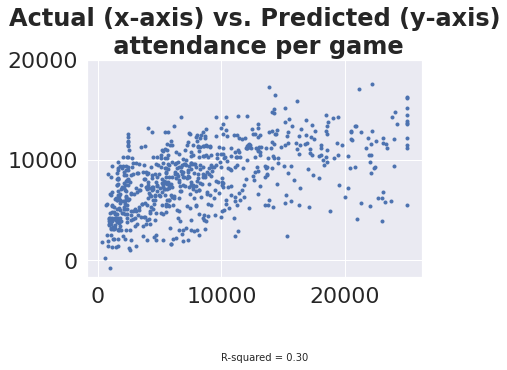

In [88]:
## Plot actual and predicted values for Linear regression

plt.plot(y_test,preds, marker='.',linestyle='none')
plt.title('Actual (x-axis) vs. Predicted (y-axis)\n attendance per game', fontweight='bold')

plt.text(10000, -10000, 'R-squared = %.2f' %r2_score(y_test,preds), size=10)
plt.xticks([0,10000,20000])
plt.yticks([0,10000,20000])

plt.show()  

In [89]:
## LASSO, ridge 활용한 데이터 스케일링
ridge_s = Ridge()
    
ridge_s.fit(X_train, y_train)

ridge_pred_s = ridge_s.predict(X_test)
    
mae_ridge_s = mae(y_test, ridge_pred_s)
print(round(mae_ridge_s,1)) ##RIDGE 회귀 MAE 평가지표 값

3976.8


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


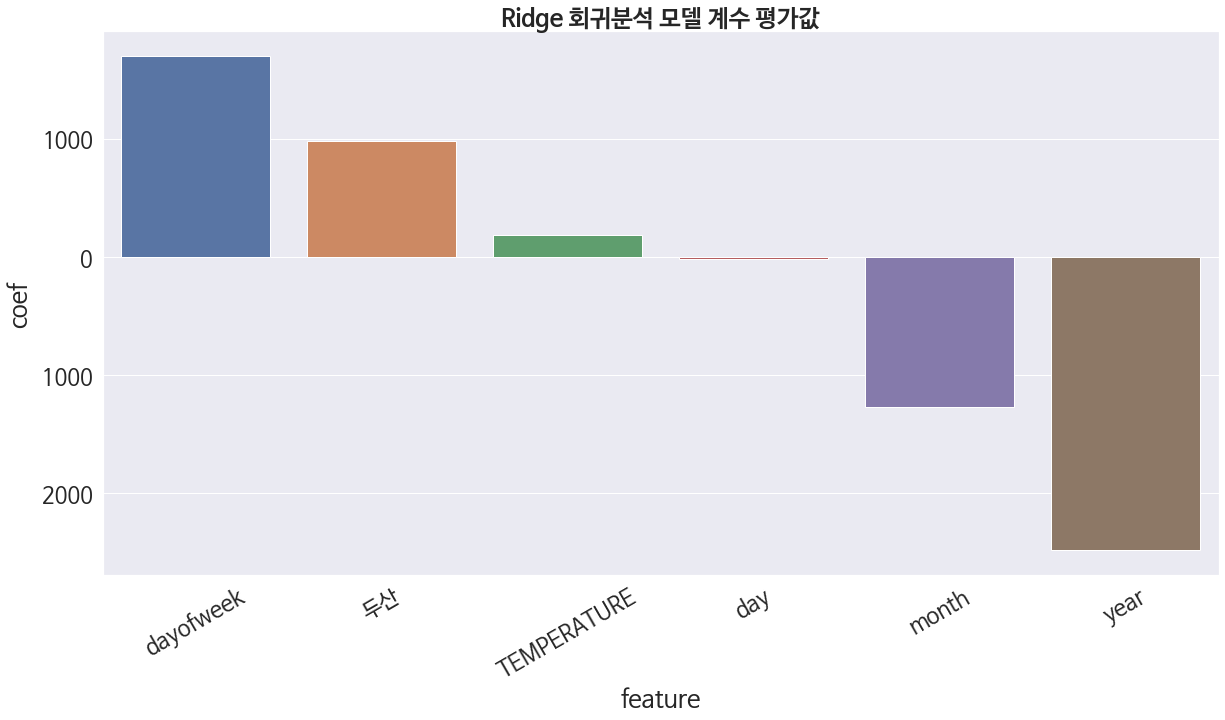

가장 긍정적인 영향을 주는 변수들: 
                    coef
feature                 
dayofweek    1698.727762
두산            980.639759
TEMPERATURE   185.593883 

가장 부정적인 영향을 주는 변수들: 
                coef
feature             
day       -21.347963
month   -1274.797419
year    -2483.593882


In [90]:
## Lasso, Ridge 회귀 평가값 시각화
## 새로운 데이터프레임 생성 후 rigde 회귀 계수값 시각화

plt.rc('font', family='NanumBarunGothic') 
df_r= pd.DataFrame()
df_r['feature']=x_b.columns
df_r['coef']=ridge_s.coef_

df_r.sort_values(by='coef',ascending=False, inplace=True)
df_r.reset_index(inplace=True)
del df_r['index']

df_r.set_index('feature',inplace=True)

fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.barplot(x=df_r.index, y=df_r['coef'])
plt.xticks(rotation=30)
plt.title('Ridge 회귀분석 모델 계수 평가값', fontweight='bold')

plt.show()

print('가장 긍정적인 영향을 주는 변수들: \n' + str(df_r[:3]), '\n')
print('가장 부정적인 영향을 주는 변수들: \n' + str(df_r[-3:]))

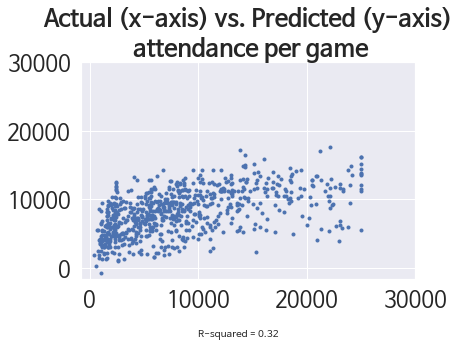

In [91]:
## Plot actual and predicted values for Ridge regression

plt.plot(y_test, ridge_pred_s, marker='.',linestyle='none')
plt.title('Actual (x-axis) vs. Predicted (y-axis)\n attendance per game', fontweight='bold')

plt.text(10000, -10000, 'R-squared = %.2f' %ridge_s.score(X_train, y_train), size=10)
plt.xticks([0,10000,20000,30000])
plt.yticks([0,10000,20000,30000])

plt.show()  

In [92]:
## Ridge 회귀분석을 통한 변수별 계수값 해석

for col, coef in zip(x_b.columns, ridge_s.coef_):
    print(col, round(coef,2))

year -2483.59
month -1274.8
day -21.35
dayofweek 1698.73
두산 980.64
TEMPERATURE 185.59


In [93]:
## Lasso 회귀분석 활용한 데이터 스케일링
lasso = Lasso()
lasso.fit(X_train, y_train)

preds_l = lasso.predict(X_test)

In [94]:
## Lasso 회귀분석 

errors_l = abs(preds_l - y_test)

print('Lasso MAE:', round(np.mean(errors_l), 2), 'fans.')

# MAPE 지표 계산

mape_l = 100 * (errors_l / y_test)

# 계산 후 정확도 출력

accuracy_l = 100 - np.mean(mape_l)

print('Accuracy:', round(accuracy_l, 2), '%.')

#RMSE 지표 평가
print("Lasso Train RMSE:", np.round(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train))), 5))
print("Lasso Test RMSE:", np.round(np.sqrt(mean_squared_error(y_test,lasso.predict(X_test))), 5))

Lasso MAE: 3976.87 fans.
Accuracy: 13.3 %.
Lasso Train RMSE: 4886.85913
Lasso Test RMSE: 5191.46551


In [95]:
for f, coef in zip(x_b.columns, lasso.coef_):
    print(f, round(coef,2))

year -2484.13
month -1274.11
day -20.42
dayofweek 1698.68
두산 980.14
TEMPERATURE 184.4


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


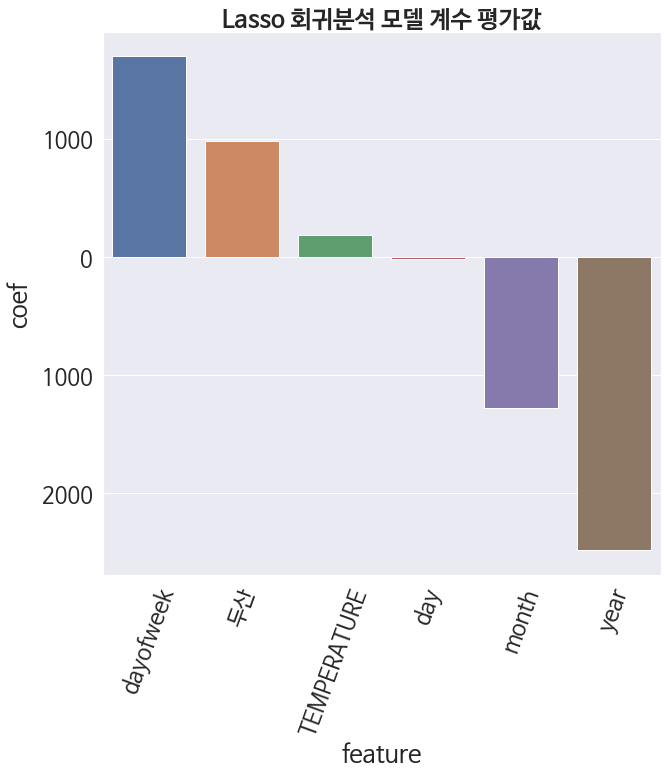

In [96]:
## LASSO 회귀분석 평가값 지표 시각화
plt.rc('font', family='NanumBarunGothic') 
df_L=pd.DataFrame()
df_L['feature']=x_b.columns
df_L['coef']=lasso.coef_

df_L.sort_values(by='coef',ascending=False,inplace=True)
df_L.reset_index(inplace=True)
del df_L['index']

df_L.set_index('feature',inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.barplot(x=df_L.index, y=df_L['coef'])
plt.xticks(rotation=70)
plt.title('Lasso 회귀분석 모델 계수 평가값' , fontweight='bold')

plt.show()


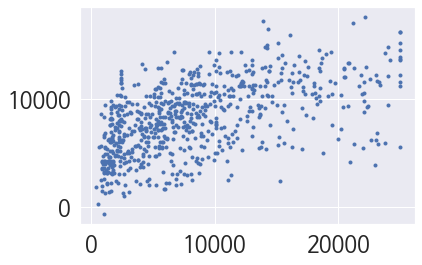

R-squared for Lasso: 0.32


In [97]:
## Lasso 회귀변수를 통한 관중모델 예측값, 실측값 산점도 시각화

plt.plot(y_test, preds_l, marker='.', linestyle='none')
plt.show()

print('R-squared for Lasso: %.2f' % lasso.score(X_train, y_train))   

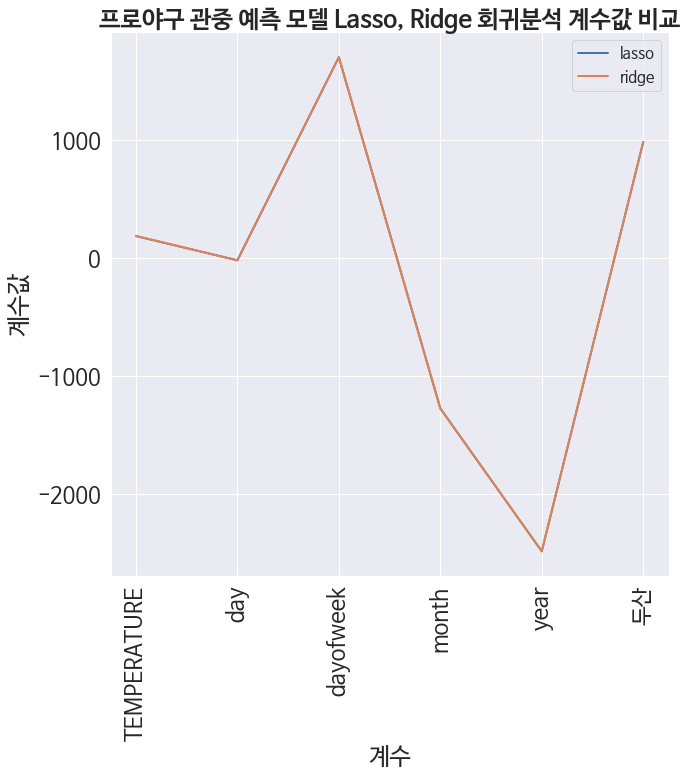

In [98]:
## Ridge, Lasso 계수값 비교 시각화

ridge_lasso=pd.DataFrame(index=df_L.sort_index().index)
ridge_lasso['lasso'] = df_L.sort_index()['coef']
ridge_lasso['ridge'] = df_r.sort_index()['coef']

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(ridge_lasso.index, ridge_lasso['lasso'], label='lasso', linewidth=2)
ax.plot(ridge_lasso.index, ridge_lasso['ridge'], label='ridge', linewidth=2)
plt.xticks(rotation=90)
plt.ylabel('계수값')
plt.xlabel('계수')
plt.rcParams['axes.unicode_minus'] = False 
plt.legend(loc='best', prop={'size':15})
plt.title('프로야구 관중 예측 모델 Lasso, Ridge 회귀분석 계수값 비교', fontweight='bold')

plt.show()

선형회귀모델 적용 후 Lasso, Ridge 모델로 스케일링을 진행
프로야구 관중 예측모델에서 가장 높은 계수는 주말/평일 구분 계수와 경기장수용인원이었다.

라쏘, 릿지 회귀모델 모두 계수값 중복으로 큰 차이가 없었음

In [99]:

## 기온과 음의 계수값, 과대 계수값을 보인 변수 제외한 ridge 회귀변수값
to_exclude=['month','year','TEMPERATURE']
no_minus=x_b.drop(to_exclude, axis=1)

no_minus_scale=scale(no_minus)

x_m_train, x_m_test, y_m_train, y_m_test= train_test_split(no_minus, y, test_size=0.3, random_state=15)
ridge_m = Ridge()

ridge_m.fit(x_m_train, y_m_train)

preds_m = ridge_m.predict(x_m_test)

errors_m = abs(preds_m - y_m_test)

print('Ridge MAE 값을 통해 예측한 관중모델 값:', round(np.mean(errors_m), 2), 'fans.')

# Calculate mean absolute percentage error (MAPE)

mape_m = 100 * (errors_m / y_m_test)

# Calculate and display accuracy

accuracy_m = 100 - np.mean(mape_m)

print('정확성:', round(accuracy_m, 2), '%.')


Ridge MAE 값을 통해 예측한 관중모델 값: 4601.46 fans.
정확성: -18.86 %.


Ridge 선형회귀로 예측한 관중모델 값을 음의 계수와 기온 계수를 제외한 채 계산 했을때 예측값이 4130이 나옴

다만 정확성은 음의 값으로 예측의 정확성에 의문이 제기됨

# 선형회귀분석 모델을 통한 관중예측모델- 프로축구(K리그)

In [100]:
## 모델 개발을 위한 전처리(결측치 확인)
KLEAGUE['TEMPERATURE'].fillna(KLEAGUE['TEMPERATURE'].mean())
KLEAGUE['ATTENDANCE'] = KLEAGUE['ATTENDANCE'].replace(0, np.NaN) ##무관중경기 결측치 처리

In [101]:
KLEAGUE.dropna(inplace=True) ## 기온, 날씨 결측치 제거

In [102]:

KLEAGUE.dtypes

DATE                   datetime64[ns]
DAY                            object
hometeam                       object
awayteam                       object
STADIUM                        object
WEATHER                        object
TEMPERATURE                   float32
ATTENDANCE                    float64
attendance_capacity             int64
year                            int64
month                           int64
day                             int64
dayofweek                       int64
is_weekend                      int64
game                            int64
occupancy                     float64
attendance_per_game           float64
dtype: object

In [103]:
KLEAGUE.drop(['DAY'],axis=1)

,DATE,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,is_weekend,game,occupancy,attendance_per_game
0,2018-03-01,제주,서울,제주W,맑음,7.300000,4979.0,29790,2018,3,1,3,0,1,0.167137,4979.0
1,2018-03-01,수원,전남,수원W,맑음,-3.600000,8456.0,43923,2018,3,1,3,0,1,0.192519,8456.0
2,2018-03-01,전북,울산,전주W,맑음,3.000000,17188.0,36780,2018,3,1,3,0,1,0.467319,17188.0
3,2018-03-03,강원,인천,춘천,맑음,11.600000,4530.0,20000,2018,3,3,5,1,1,0.226500,4530.0
4,2018-03-03,포항,대구,포항스틸야드,맑음,9.900000,14584.0,15170,2018,3,3,5,1,1,0.961371,14584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2022-07-05,김천,제주,김천,흐림,32.900002,557.0,25000,2022,7,5,1,0,1,0.022280,557.0
967,2022-07-05,울산,강원,울산문수W,구름많음,30.000000,3344.0,43554,2022,7,5,1,0,1,0.076778,3344.0
968,2022-07-06,수원,대구,수원W,비,34.500000,2231.0,43923,2022,7,6,2,0,1,0.050793,2231.0
969,2022-07-06,서울,전북,서울W,비,33.299999,8537.0,66704,2022,7,6,2,0,1,0.127983,8537.0


In [104]:

#가변수 처리(원핫인코딩, 라벨인코딩) 후 데이터프레임 생성
team_dummies=pd.get_dummies(KLEAGUE['hometeam'])
weather_dummies=pd.get_dummies(KLEAGUE['WEATHER'])
KLEAGUE=pd.concat([KLEAGUE,team_dummies,weather_dummies], axis=1)
KLEAGUE.drop(['DAY'],axis=1)
KLEAGUE.head()

,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,...,전남,전북,제주,포항,구름많음,구름조금,눈,맑음,비,흐림
0,2018-03-01,목,제주,서울,제주W,맑음,7.3,4979.0,29790,2018,...,0,0,1,0,0,0,0,1,0,0
1,2018-03-01,목,수원,전남,수원W,맑음,-3.6,8456.0,43923,2018,...,0,0,0,0,0,0,0,1,0,0
2,2018-03-01,목,전북,울산,전주W,맑음,3.0,17188.0,36780,2018,...,0,1,0,0,0,0,0,1,0,0
3,2018-03-03,토,강원,인천,춘천,맑음,11.6,4530.0,20000,2018,...,0,0,0,0,0,0,0,1,0,0
4,2018-03-03,토,포항,대구,포항스틸야드,맑음,9.9,14584.0,15170,2018,...,0,0,0,1,0,0,0,1,0,0


In [105]:
##종속변수 설정
y_1 = KLEAGUE['attendance_per_game']

In [106]:
## 후진 소거법
variables=KLEAGUE.columns[:-2].tolist() ##설명변수 리스트

y=KLEAGUE['attendance_per_game']
selected_variables=variables
sl_remove=0.05

sv_per_stop=[] ##스텝별 선택된 변수들
adjusted_r_squared=[] ##스텝별 수정된 결정계수
steps=[] 
step=0

while len(selected_variables) > 0:
    X = sm.add_constant(KLEAGUE[selected_variables+[col]])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(KLEAGUE[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: ignored

In [107]:
selected_variables

['DATE',
 'DAY',
 'hometeam',
 'awayteam',
 'STADIUM',
 'WEATHER',
 'TEMPERATURE',
 'ATTENDANCE',
 'attendance_capacity',
 'year',
 'month',
 'day',
 'dayofweek',
 'is_weekend',
 'game',
 'occupancy',
 'attendance_per_game',
 '강원',
 '경남',
 '광주',
 '김천',
 '대구',
 '대전',
 '부산',
 '상주',
 '서울',
 '성남',
 '수원',
 '수원F',
 '울산',
 '인천',
 '전남',
 '전북',
 '제주',
 '포항',
 '구름많음',
 '구름조금',
 '눈',
 '맑음']

In [109]:
x=KLEAGUE[['year','month','dayofweek','is_weekend','전북','occupancy','TEMPERATURE']] ## 독립변수= 홈팀명, 기온, 경기장 수용인원, 연월일, 주말 및 평일 가변수,날씨, 팀명

In [110]:
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error as mae # mae 코드 호출

X = scale(x) # 변수를 일반적인 크기로 조정
X_train, X_test, y_1_train, y_1_test = train_test_split(X, y_1, test_size=0.30, random_state = 15) ##테스트셋, 훈련셋 70:30으로 분리

linreg_scale = LinearRegression()

linreg_scale.fit(X_train, y_1_train)

preds = linreg_scale.predict(X_test)
mae_linreg_s = mae(y_1_test, preds)
print(preds)
print('MAE (Mean Absolute Error)를 통한 프로축구 관중 예측 선형회귀모델 값: %.2f' %mae_linreg_s) ## MAE (Mean Absolute Error)를 통한 평가지표 값 검증

[ 2724.63996372  2268.78605407 12926.50755816  1743.54554039
  2390.40592386  6370.61187994  8846.52472324  6013.07617333
  1610.09014942  3355.63558278  7620.41848874  4754.68273995
  4052.49308982  2761.63003487  3411.67486343  3118.10537352
  3443.84390447  1971.68615143  4196.49527239  2737.42697961
  7225.99250227  2385.99641495  3168.67643017 11331.30037344
  4198.7313401   6004.53947206  2242.13065286  4821.86452041
  2948.32299327  2483.21264639  4342.0236125   8396.82558294
  1728.14842453  6914.86063324 13025.91779694  7218.49968752
  4312.65704491  5137.48236555 10280.70400215  3739.95378857
  2889.22836308  2791.84174448  1667.6701396   3286.48700122
  2248.91244271  3239.47609129  3164.92774906  5835.96622044
  2170.47927359 11995.8010011   7645.57717782  5059.7769126
  7594.4511082   4871.98926774  5178.62165821  1120.58941752
  2984.80707257 12739.50744209  2857.69360675  6245.40716654
   969.3232775   4803.86736614  2795.99563624  2310.01282834
  3869.53479593   900.201

In [111]:
##RMSE 평가지표 값을 통한 관중 예측값 결과 확인
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_1_test, preds) 
np.sqrt(MSE)
print('RMSE 평가를 통한 프로축구 관중 예측 선형회귀모델 값 : %.2f' %np.sqrt(MSE))

RMSE 평가를 통한 프로축구 관중 예측 선형회귀모델 값 : 3213.51


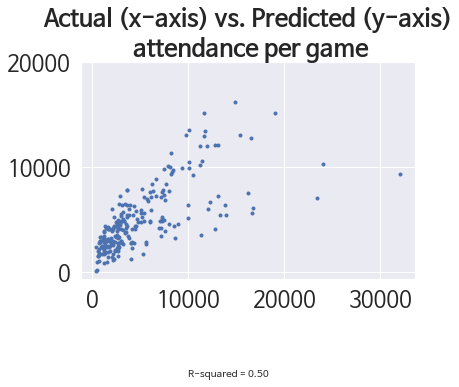

In [112]:
## Plot actual and predicted values for Linear regression

plt.plot(y_1_test,preds, marker='.',linestyle='none')
plt.title('Actual (x-axis) vs. Predicted (y-axis)\n attendance per game', fontweight='bold')

plt.text(10000, -10000, 'R-squared = %.2f' %r2_score(y_1_test,preds), size=10)
plt.xticks([0,10000,20000,30000])
plt.yticks([0,10000,20000])

plt.show()  

In [113]:
import numpy as np
import pandas as pd
train = pd.DataFrame(X_train, columns=['year','month','dayofweek','is_weekend','눈','비','구름많음','맑음','흐림', '구름조금','전북','울산','포항','상주','수원','수원F','인천','대구','제주','서울','강원','성남','광주','김천']).to_csv('Football_train.csv')
test= pd.DataFrame(X_test, columns=['year','month','dayofweek','is_weekend','눈','비','구름많음','맑음','흐림', '구름조금','전북','울산','포항','상주','수원','수원F','인천','대구','제주','서울','강원','성남','광주','김천']).to_csv('Football_test.csv')
train = pd.DataFrame(y_1_train, columns=['attendance_per_game']).to_csv('Footballattendance_train.csv')
test= pd.DataFrame(y_1_test, columns=['attendance_per_game']).to_csv('Footballattendance_test.csv')


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(preds, columns=['preds']).to_csv('football_prediction.csv')

In [114]:



## Lasso 회귀분석 활용한 데이터 스케일링
lasso = Lasso()
lasso.fit(X_train, y_1_train)

preds_l = lasso.predict(X_test)

In [115]:
## Lasso 회귀분석 

errors_l = abs(preds_l - y_1_test)

print('Lasso MAE:', round(np.mean(errors_l), 2), 'fans.')

# MAPE 지표 계산

mape_l = 100 * (errors_l / y_1_test)

# 계산 후 정확도 출력

accuracy_l = 100 - np.mean(mape_l)

print('Accuracy:', round(accuracy_l, 2), '%.')


#RMSE 지표 계산
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_1_test, preds) 
np.sqrt(MSE)
print('RMSE 평가를 통한 프로축구 관중 예측 선형회귀모델 값 : %.2f' %np.sqrt(MSE))
print("Lasso Train RMSE:", np.round(np.sqrt(mean_squared_error(y_1_train, lasso.predict(X_train))), 1))
print("Lasso Test RMSE:", np.round(np.sqrt(mean_squared_error(y_1_test,lasso.predict(X_test))), 1))

Lasso MAE: 1996.75 fans.
Accuracy: 38.81 %.
RMSE 평가를 통한 프로축구 관중 예측 선형회귀모델 값 : 3213.51
Lasso Train RMSE: 3237.2
Lasso Test RMSE: 3213.4


In [116]:
for f, coef in zip(x.columns, lasso.coef_):
    print(f, round(coef,2))

year -627.19
month -165.79
dayofweek 801.48
is_weekend -434.95
전북 1247.61
occupancy 2701.63
TEMPERATURE 39.42


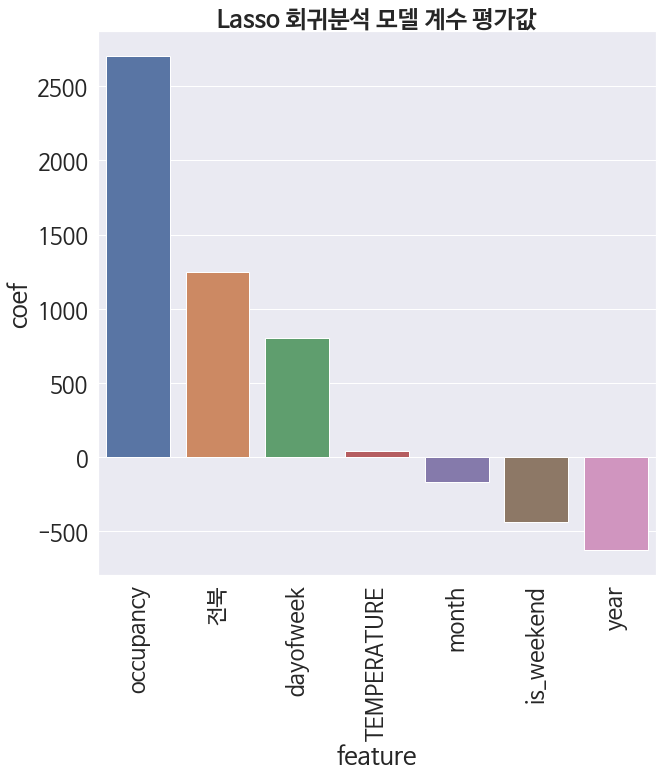

가장 긍정적인 영향을 주는 변수들: 
                  coef
feature               
occupancy  2701.627054
전북         1247.614298
dayofweek   801.477456 

가장 부정적인 영향을 주는 변수들: 
                  coef
feature               
month      -165.788770
is_weekend -434.950096
year       -627.194670


In [117]:
## LASSO 회귀분석 평가값 지표 시각화
plt.rc('font', family='NanumBarunGothic') 
df_L=pd.DataFrame()
df_L['feature']=x.columns
df_L['coef']=lasso.coef_

df_L.sort_values(by='coef',ascending=False,inplace=True)
df_L.reset_index(inplace=True)
del df_L['index']

df_L.set_index('feature',inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.barplot(x=df_L.index, y=df_L['coef'])
plt.xticks(rotation=90)
plt.title('Lasso 회귀분석 모델 계수 평가값' , fontweight='bold')

plt.show()

print('가장 긍정적인 영향을 주는 변수들: \n' + str(df_L[:3]), '\n')
print('가장 부정적인 영향을 주는 변수들: \n' + str(df_L[-3:]))

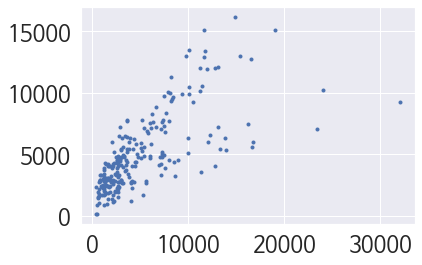

R-squared for Lasso: 0.53


In [118]:
## Lasso 회귀변수를 통한 관중모델 예측값, 실측값 산점도 시각화

plt.plot(y_1_test, preds_l, marker='.', linestyle='none')
plt.show()

print('R-squared for Lasso: %.2f' % lasso.score(X_train, y_1_train))   

In [119]:




## ridge 활용한 데이터 스케일링
ridge_s = Ridge(alpha=100)
    
ridge_s.fit(X_train, y_1_train)

ridge_pred_s = ridge_s.predict(X_test)
    
mae_ridge_s = mae(y_1_test, ridge_pred_s)
print(round(mae_ridge_s,1)) ##RIDGE 회귀 MAE 평가지표 값
print("Ridge Train RMSE:", np.round(np.sqrt(mean_squared_error(y_1_train, ridge_s.predict(X_train))), 5))
print("Ridge Test RMSE:", np.round(np.sqrt(mean_squared_error(y_1_test,ridge_s.predict(X_test))), 5))

2029.2
Ridge Train RMSE: 3270.45358
Ridge Test RMSE: 3263.80223


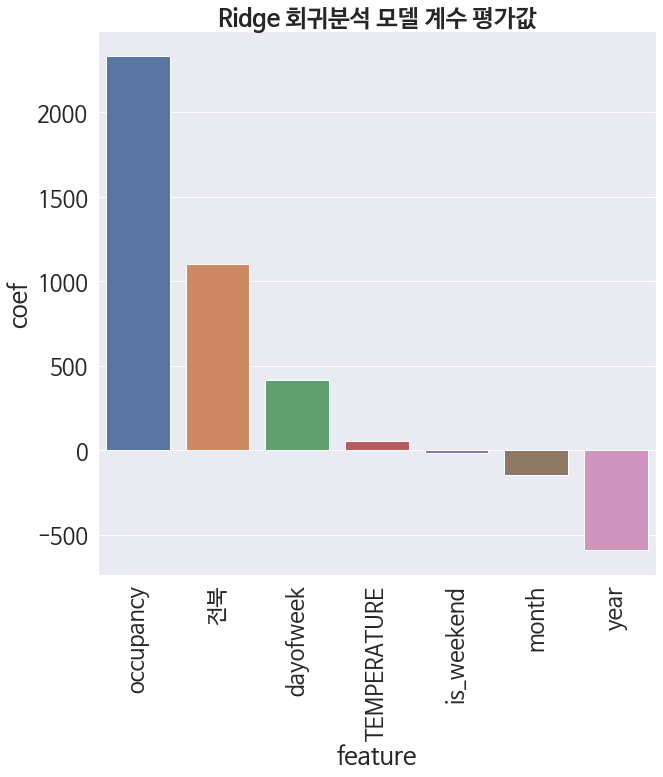

가장 긍정적인 영향을 주는 변수들: 
                  coef
feature               
occupancy  2333.219094
전북         1104.043995
dayofweek   416.285096 

가장 부정적인 영향을 주는 변수들: 
                  coef
feature               
is_weekend  -16.346494
month      -149.002804
year       -593.775858


In [120]:

## Lasso, Ridge 회귀 평가값 시각화
## 새로운 데이터프레임 생성 후 rigde 회귀 계수값 시각화

plt.rc('font', family='NanumBarunGothic') 
df_r= pd.DataFrame()
df_r['feature']=x.columns
df_r['coef']=ridge_s.coef_

df_r.sort_values(by='coef',ascending=False, inplace=True)
df_r.reset_index(inplace=True)
del df_r['index']

df_r.set_index('feature',inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.barplot(x=df_r.index, y=df_r['coef'])
plt.xticks(rotation=90)
plt.rcParams['axes.unicode_minus'] = False 
plt.title('Ridge 회귀분석 모델 계수 평가값', fontweight='bold')

plt.show()

print('가장 긍정적인 영향을 주는 변수들: \n' + str(df_r[:3]), '\n')
print('가장 부정적인 영향을 주는 변수들: \n' + str(df_r[-3:]))

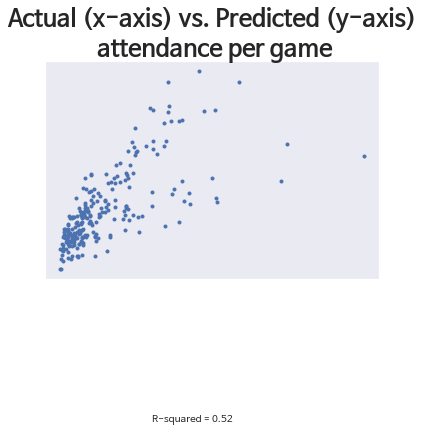

In [121]:
## Plot actual and predicted values for Ridge regression

plt.plot(y_1_test, ridge_pred_s, marker='.',linestyle='none')
plt.title('Actual (x-axis) vs. Predicted (y-axis)\n attendance per game', fontweight='bold')

plt.text(10000, -10000, 'R-squared = %.2f' %ridge_s.score(X_train, y_1_train), size=10)
plt.xticks([])
plt.yticks([])

plt.show()  

In [122]:
## Ridge 회귀분석을 통한 변수별 계수값 해석

for col, coef in zip(x.columns, ridge_s.coef_):
    print(col, round(coef,2))

year -593.78
month -149.0
dayofweek 416.29
is_weekend -16.35
전북 1104.04
occupancy 2333.22
TEMPERATURE 53.96


In [123]:
## 기온과 음의 계수값, 과대 계수값을 보인 변수 제외한 ridge 회귀변수값
to_exclude=['month','year']
no_minus=x.drop(to_exclude, axis=1)

no_minus_scale=scale(no_minus)

X_train, X_test, y_1_train, y_1_test= train_test_split(no_minus, y, test_size=0.35, random_state=15)
ridge_m = Ridge()

ridge_m.fit(X_train, y_1_train)

preds_m = ridge_m.predict(X_test)

errors_m = abs(preds_m - y_1_test)

print('Ridge MAE 값을 통해 예측한 관중모델 값:', round(np.mean(errors_m),1), 'fans.')

# Calculate mean absolute percentage error (MAPE)

mape_m = 100 * (errors_m / y_1_test)

# Calculate and display accuracy

accuracy_m = 100 - np.mean(mape_m)

print('정확성:', round(accuracy_m, 2), '%.')


Ridge MAE 값을 통해 예측한 관중모델 값: 2070.4 fans.
정확성: 32.93 %.


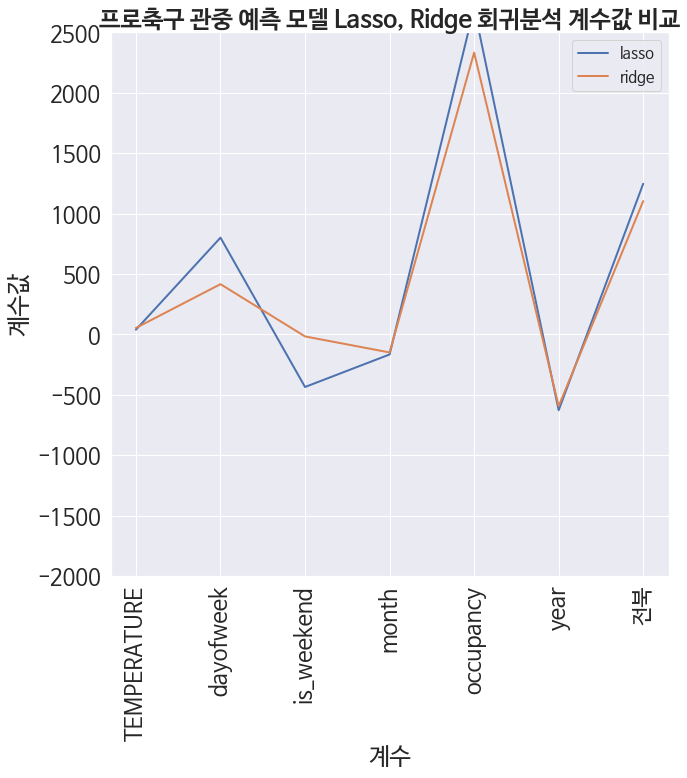

In [124]:
## Ridge, Lasso 계수값 비교 시각화

ridge_lasso=pd.DataFrame(index=df_L.sort_index().index)
ridge_lasso['lasso'] = df_L.sort_index()['coef']
ridge_lasso['ridge'] = df_r.sort_index()['coef']

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(ridge_lasso.index, ridge_lasso['lasso'], label='lasso', linewidth=2)
ax.plot(ridge_lasso.index, ridge_lasso['ridge'], label='ridge', linewidth=2)
plt.xticks(rotation=90)
plt.ylim([-2000,2500])
plt.ylabel('계수값')
plt.xlabel('계수')
plt.rcParams['axes.unicode_minus'] = False 
plt.legend(loc='best', prop={'size':15})
plt.title('프로축구 관중 예측 모델 Lasso, Ridge 회귀분석 계수값 비교', fontweight='bold')

plt.show()

RMSE로 프로축구 관중 예측 모델을 평가했을 때, 릿지, 라쏘 회귀모델을 평가한 MAE 값보다 높았음

원핫인코딩으로 팀명 변수와 날씨 변수 입력 후 기존 독립변수와 경기당 관중수 관계를 Lasso, Ridge로 스케일링한 선형회귀모델을 적용했을 때
K리그의 관중 모델은 라쏘, 릿지 모델 계수값 편차가 심했음



전체적으로 프로야구에 비해 라쏘와 릿지 모델 계수값 그래프 차이가 있음

# 선형회귀모델을 통한 관중예측- 프로배구(여자)

In [126]:
## 모델 개발을 위한 전처리
WOMAN_KOVO.isna().sum()
WOMAN_KOVO['ATTENDANCE'] = WOMAN_KOVO['ATTENDANCE'].replace(0, np.NaN) ##무관중경기 결측치 처리

In [127]:
WOMAN_KOVO.dropna(inplace=True) ## 기온, 날씨 결측치 제거

In [128]:
# 원핫인코딩 가변수 생성
team_dummies=pd.get_dummies(WOMAN_KOVO['hometeam'])
weather_dummies=pd.get_dummies(WOMAN_KOVO['WEATHER'])

WOMAN_KOVO['attendance_per_game'] = WOMAN_KOVO['ATTENDANCE'] / WOMAN_KOVO['game'] ##경기당 입장 수
WOMAN_KOVO=pd.concat([WOMAN_KOVO,team_dummies,weather_dummies], axis=1) ##홈팀, 날씨, 체육관 가변수 생성
WOMAN_KOVO.drop(['DAY','attendance_capacity'],axis=1)
WOMAN_KOVO.head()

,SEASON,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,...,페퍼저축은행,한국도로공사,현대건설,흥국생명,구름많음,구름조금,눈,맑음,비,흐림
0,2021~2022,2022-03-21,월,흥국생명,GS칼텍스,인천삼산월드,구름많음,8.3,489.0,7140,...,0,0,0,1,1,0,0,0,0,0
1,2021~2022,2022-03-20,일,IBK기업은행,KGC인삼공사,화성,구름많음,8.6,1576.0,5158,...,0,0,0,0,1,0,0,0,0,0
2,2021~2022,2022-03-05,토,한국도로공사,흥국생명,김천,맑음,10.3,805.0,8000,...,0,1,0,0,0,0,0,1,0,0
3,2021~2022,2022-03-03,목,KGC인삼공사,페퍼저축은행,대전충무,맑음,14.6,437.0,6000,...,0,0,0,0,0,0,0,1,0,0
4,2021~2022,2022-03-02,수,흥국생명,IBK기업은행,인천계양,맑음,6.4,784.0,7140,...,0,0,0,1,0,0,0,1,0,0


In [129]:
## 후진 소거법
variables=WOMAN_KOVO.columns[:-2].tolist() ##설명변수 리스트

y=WOMAN_KOVO['attendance_per_game']
selected_variables=variables
sl_remove=0.05

sv_per_stop=[] ##스텝별 선택된 변수들
adjusted_r_squared=[] ##스텝별 수정된 결정계수
steps=[] 
step=0

while len(selected_variables) > 0:
    X = sm.add_constant(WOMAN_KOVO[selected_variables+[col]])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(KLEAGUE[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: ignored

In [130]:
selected_variables

['SEASON',
 'DATE',
 'DAY',
 'hometeam',
 'awayteam',
 'STADIUM',
 'WEATHER',
 'TEMPERATURE',
 'ATTENDANCE',
 'attendance_capacity',
 'year',
 'month',
 'day',
 'dayofweek',
 'is_weekend',
 'game',
 'occupancy',
 'attendance_per_game',
 'GS칼텍스',
 'IBK기업은행',
 'KGC인삼공사',
 '페퍼저축은행',
 '한국도로공사',
 '현대건설',
 '흥국생명',
 '구름많음',
 '구름조금',
 '눈',
 '맑음']

In [131]:
## 종속변수
y_2 = WOMAN_KOVO['attendance_per_game']

In [132]:

y_2.to_csv('womanvolleyballattendance.csv')

In [133]:
## 독립변수
X_2=WOMAN_KOVO[['year','month','day','dayofweek','GS칼텍스','occupancy']]

In [134]:
#선형회귀 코드 입력 및 테스트, 실행 모델,  MAE 평가값 적용
from sklearn.linear_model import LinearRegression, Lasso ,Ridge
from sklearn.model_selection import train_test_split #훈련세트 분리
from sklearn.metrics import mean_absolute_error as mae # mae 코드 호출

x_2=scale(X_2)

x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size=0.30, random_state = 15)

linreg_scale = LinearRegression()

linreg_scale.fit(x_2_train, y_2_train)

preds = linreg_scale.predict(x_2_test)

print(preds) ##예측값 출력
mae_linreg_s = mae(y_2_test, preds)
print('MAE (Mean Absolute Error)를 통한 프로배구 관중 예측 선형회귀모델 값: %.2f' %mae_linreg_s) ## MAE (Mean Absolute Error)를 통한 평가지표 값 검증

[1370.10067731 1530.14949678 1391.84860582 1566.60032257 3413.42854634
 1881.60965977 2923.52378416 1480.90870008 1793.76130299 3246.81444238
 3666.95135735 1161.09050824 4211.60954158 2671.18943321  888.04581627
 3248.10337103 2900.54101987 2458.89657694 1026.60362819 2377.05464408
 3050.77490387 2476.58548861 4340.21099888 2638.8226351   753.22432752
 1241.89532018 2250.45796498 1596.82946937 1362.59902345 4172.05611017
 1954.84345347  866.44832697 2642.69788045 2125.28302223 3052.89141196
 5023.29812114 1424.877315   1689.64627144 1935.75692417  846.41461653
 3595.49172226 2517.71086352 1438.26221854 1455.42618978 2054.49095314
 1660.57215807 1320.09889069 1690.76454284  798.93126357 2168.43038045
 2698.56933014 3528.821514   4237.64366861 5135.80399645 1754.94380918
  814.71117653 1604.93575176 3429.3807644   772.04265104 1755.0637515
 1927.1246647  1477.09091319 1650.2625001   995.72251879 1791.74716027
 1992.68253917 1526.03499882  869.49714163 1104.80410434 1665.83376219
 1742.8

In [135]:
### RMSE 수치로 예측값 판단
from sklearn.metrics import mean_squared_error as MSE
MSE = mean_squared_error(y_2_test, preds) 
np.sqrt(MSE)
print('RMSE 평가를 통한 여자프로배구 관중 예측 선형회귀모델 값 : %.2f' %np.sqrt(MSE))

RMSE 평가를 통한 여자프로배구 관중 예측 선형회귀모델 값 : 428.68


In [136]:

##r2_score 평가값
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
print('r2_score: {}'.format(r2_score(y_2_test,preds)))

r2_score: 0.8733523262961708


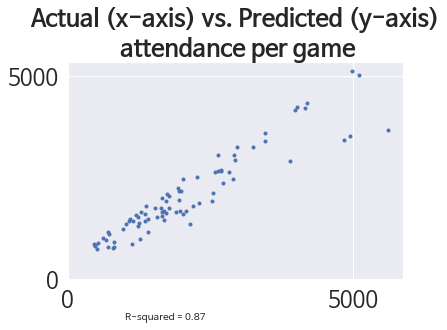

In [137]:
## Plot actual and predicted values for Linear regression
plt.plot(y_2_test,preds, marker='.',linestyle='none')
plt.title('Actual (x-axis) vs. Predicted (y-axis)\n attendance per game', fontweight='bold')

plt.text(1000, -1000, 'R-squared = %.2f' %r2_score(y_2_test,preds), size=10)
plt.xticks([0,5000])
plt.yticks([0,5000])

plt.show()  

In [138]:
X_2.to_csv('womankovoattendancevariables.csv')

In [139]:
import numpy as np
import pandas as pd
Train= pd.DataFrame(preds, columns=['preds']).to_csv('womanvolleyball_prediction.csv')

In [140]:
import numpy as np
import pandas as pd
X_test = pd.DataFrame(y_2_train, columns=['attendance_per_game']).to_csv('womanvolleyball_train.csv')
y_2_test=pd.DataFrame(y_2_test,columns=['attendance_per_game']).to_csv('womanvolleyball_test.csv')

In [141]:
x_2_train.shape
x_2_test.shape
y_2_train.shape
y_2_test.shape

AttributeError: ignored

In [142]:
mae_linreg_s = mae(y_2_test,preds)

print('MAE (Mean Absolute Error)를 통한 평가지표 값: %.2f' %mae_linreg_s) ## MAE (Mean Absolute Error)를 통한 평가지표 값 검증

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


ValueError: ignored

In [143]:
## Lasso 회귀분석 활용한 데이터 스케일링
lasso = Lasso()
lasso.fit(x_2_train, y_2_train)

preds_l = lasso.predict(x_2_test)
# MAPE 지표 계산

mape_l = 100 * (errors_l / y_2_test)

# 계산 후 정확도 출력

accuracy_l = 100 - np.mean(mape_l)

print('Accuracy:', round(accuracy_l, 1), '%.')

print("Lasso Train RMSE:", np.round(np.sqrt(mean_squared_error(y_2_train, lasso.predict(x_2_train))),1))
print("Lasso Test RMSE:", np.round(np.sqrt(mean_squared_error(y_2_test,lasso.predict(x_2_test))), 1))

TypeError: ignored

ValueError: ignored

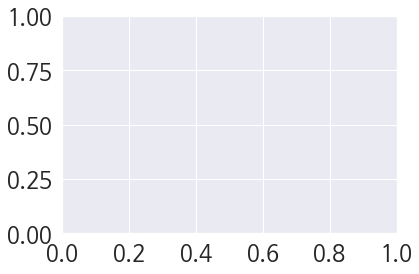

In [144]:
## Plot actual and predicted values for Linear regression

plt.plot(y_test,preds, marker='.',linestyle='none')
plt.title('Actual (x-axis) vs. Predicted (y-axis)\n attendance per game', fontweight='bold')

plt.text(10000, -10000, 'R-squared = %.2f' %r2_score(y_2_test,preds), size=10)
plt.xticks([0,10000,20000])
plt.yticks([0,10000,20000])

plt.show()  

In [145]:
## Lasso 회귀분석 평가지표: MAE값 

errors_l = abs(preds_l - y_2_test)

print('Lasso MAE:', round(np.mean(errors_l), 2), 'fans.')

TypeError: ignored

In [146]:
ridge_s = Ridge()
    
ridge_s.fit(x_2_train, y_2_train)

ridge_pred_s = ridge_s.predict(x_2_test)
    
mae_ridge_s = mae(y_2_test, ridge_pred_s)
print(round(mae_ridge_s,1)) ##RIDGE 회귀 MAE 평가지표 값

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


ValueError: ignored

In [147]:
## Ridge 회귀분석 활용한 데이터 스케일링
from sklearn.linear_model import Ridge


ridge=Ridge()
ridge = Ridge(alpha=10).fit(x_2_train, y_2_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(x_2_train,y_2_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(x_2_test,y_2_test)))



ridge.fit(x_2_train, y_2_train)

ridge_pred = ridge.predict(x_2_test)
    
mae_ridge = mae(y_2_test, ridge_pred)
print(round(mae_ridge,1)) ##RIDGE 회귀 MAE 평가지표 값

print("Ridge Train RMSE:", np.round(np.sqrt(mean_squared_error(y_2_train, ridge.predict(x_2_train))),2))
print("Ridge Test RMSE:", np.round(np.sqrt(mean_squared_error(y_2_test,ridge.predict(x_2_test))),2))

훈련 세트 점수: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


ValueError: ignored